In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [209]:
# data from https://www.kaggle.com/datasets/CooperUnion/cardataset
df = pd.read_csv("data.csv")

In [210]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# Initial Analysis

In [211]:
df.shape

(11914, 16)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [213]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [214]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

# Data Cleaning and Feature Engineering

In [215]:
original_shape = df.shape

In [216]:
df.duplicated().sum()

np.int64(715)

In [217]:
df = df.drop_duplicates()

In [218]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [219]:
df['Market Category'] = df['Market Category'].fillna('Unknown')

In [220]:
df = df.dropna()

In [221]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [222]:
for col in df.columns:
  if df[col].dtype == 'object':
    if 'unknown' in df[col].str.lower().values:
      print(col)
  if df[col].dtype == 'float64':
    if np.nan in df[col].values:
      print(col)

Transmission Type
Market Category


In [223]:
df[df['Transmission Type'].str.lower() == 'unknown'].shape[0]

12

In [224]:
df = df.drop(df[df['Transmission Type'].str.lower() == 'unknown'].index)

In [225]:
df.rename(columns={'highway MPG': 'Highway MPG', 'city mpg': 'City MPG', 'Driven_Wheels': 'Driven Wheels'}, inplace=True)

In [226]:
df[(df == 0).any(axis=1)]

Make                   Model  Year Engine Fuel Type  Engine HP  \
1680  Mercedes-Benz  B-Class Electric Drive  2015         electric      177.0   
1681  Mercedes-Benz  B-Class Electric Drive  2016         electric      177.0   
1682  Mercedes-Benz  B-Class Electric Drive  2017         electric      177.0   
5790            BMW                      i3  2015         electric      170.0   
5791            BMW                      i3  2016         electric      170.0   
5792            BMW                      i3  2017         electric      170.0   
5793            BMW                      i3  2017         electric      170.0   
9867      Chevrolet                Spark EV  2014         electric      140.0   
9868      Chevrolet                Spark EV  2014         electric      140.0   
9869      Chevrolet                Spark EV  2015         electric      140.0   
9870      Chevrolet                Spark EV  2015         electric      140.0   
9871      Chevrolet                Spark EV  2016         electric      140.0   
9872      Chevrolet                Spark EV  2016         electric      140.0   

      Engine Cylinders Transmission Type      Driven Wheels  Number of Doors  \
1680               0.0      DIRECT_DRIVE  front wheel drive              4.0   
1681               0.0      DIRECT_DRIVE  front wheel drive              4.0   
1682               0.0      DIRECT_DRIVE  front wheel drive              4.0   
5790               0.0      DIRECT_DRIVE   rear wheel drive              4.0   
5791               0.0      DIRECT_DRIVE   rear wheel drive              4.0   
5792               0.0      DIRECT_DRIVE   rear wheel drive              4.0   
5793               0.0      DIRECT_DRIVE   rear wheel drive              4.0   
9867               0.0      DIRECT_DRIVE  front wheel drive              4.0   
9868               0.0      DIRECT_DRIVE  front wheel drive              4.0   
9869               0.0      DIRECT_DRIVE  front wheel drive              4.0   
9870               0.0      DIRECT_DRIVE  front wheel drive              4.0   
9871               0.0      DIRECT_DRIVE  front wheel drive              4.0   
9872               0.0      DIRECT_DRIVE  front wheel drive              4.0   

       Market Category Vehicle Size  Vehicle Style  Highway MPG  City MPG  \
1680  Hatchback,Luxury      Compact  4dr Hatchback           82        85   
1681  Hatchback,Luxury      Compact  4dr Hatchback           82        85   
1682  Hatchback,Luxury      Compact  4dr Hatchback           82        85   
5790  Hatchback,Luxury      Compact  4dr Hatchback          111       137   
5791  Hatchback,Luxury      Compact  4dr Hatchback          111       137   
5792  Hatchback,Luxury      Compact  4dr Hatchback          111       137   
5793  Hatchback,Luxury      Compact  4dr Hatchback          106       129   
9867         Hatchback      Compact  4dr Hatchback          109       128   
9868         Hatchback      Compact  4dr Hatchback          109       128   
9869         Hatchback      Compact  4dr Hatchback          109       128   
9870         Hatchback      Compact  4dr Hatchback          109       128   
9871         Hatchback      Compact  4dr Hatchback          109       128   
9872         Hatchback      Compact  4dr Hatchback          109       128   

      Popularity   MSRP  
1680         617  41450  
1681         617  41450  
1682         617  39900  
5790        3916  42400  
5791        3916  42400  
5792        3916  42400  
5793        3916  43600  
9867        1385  26685  
9868        1385  27010  
9869        1385  25170  
9870        1385  25560  
9871        1385  25510  
9872        1385  25120

In [227]:
df = df[(df['Engine Cylinders'] > 0)]

## Domain-Knowledge Based Outlier Analysis

In [228]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%) - Range: [{lower:.1f}, {upper:.1f}]")

Year: 463 outliers (4.2%) - Range: [1993.5, 2029.5]
Engine HP: 501 outliers (4.5%) - Range: [-24.5, 499.5]
Engine Cylinders: 295 outliers (2.7%) - Range: [1.0, 9.0]
Number of Doors: 0 outliers (0.0%) - Range: [-1.0, 7.0]
Highway MPG: 116 outliers (1.0%) - Range: [10.0, 42.0]
City MPG: 235 outliers (2.1%) - Range: [7.0, 31.0]
Popularity: 812 outliers (7.3%) - Range: [-1641.0, 4199.0]
MSRP: 946 outliers (8.5%) - Range: [-10612.5, 75247.5]


In [229]:
print(f"Highway MPG < City MPG: {len(df[df['Highway MPG'] < df['City MPG']])}")
print(f"MSRP < $1000: {len(df[df['MSRP'] < 1000])}")
print(f"MSRP > $500k: {len(df[df['MSRP'] > 500000])}")
print(f"0 HP: {len(df[df['Engine HP'] == 0])}")
print(f"HP > 1000): {len(df[df['Engine HP'] > 1000])}")
print(f"Year > 2025: {len(df[df['Year'] > 2025])}")
print(f"Year < 1990: {len(df[df['Year'] < 1990])}")
print(f"Highway MPG > 60: {len(df[df['Highway MPG'] > 60])}")
print(f"City MPG > 50: {len(df[df['City MPG'] > 50])}")
print(f"MPG = 0: {len(df[(df['Highway MPG'] == 0) | (df['City MPG'] == 0)])}")

Highway MPG < City MPG: 156
MSRP < $1000: 0
MSRP > $500k: 11
0 HP: 0
HP > 1000): 3
Year > 2025: 0
Year < 1990: 0
Highway MPG > 60: 1
City MPG > 50: 34
MPG = 0: 0


In [230]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count < 20:  # Show all if less than 20 unique values
        print(f"  Values: {sorted(df[col].unique())}")
    else:
        print(f"  Top 5: {df[col].value_counts().head().index.tolist()}")
    print()

Make: 47 unique values
  Top 5: ['Chevrolet', 'Ford', 'Toyota', 'Volkswagen', 'Nissan']

Model: 901 unique values
  Top 5: ['Silverado 1500', 'Tundra', 'F-150', 'Sierra 1500', 'Frontier']

Engine Fuel Type: 8 unique values
  Values: ['diesel', 'flex-fuel (premium unleaded recommended/E85)', 'flex-fuel (premium unleaded required/E85)', 'flex-fuel (unleaded/E85)', 'natural gas', 'premium unleaded (recommended)', 'premium unleaded (required)', 'regular unleaded']

Transmission Type: 4 unique values
  Values: ['AUTOMATED_MANUAL', 'AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL']

Driven Wheels: 4 unique values
  Values: ['all wheel drive', 'four wheel drive', 'front wheel drive', 'rear wheel drive']

Market Category: 71 unique values
  Top 5: ['Unknown', 'Crossover', 'Flex Fuel', 'Luxury', 'Luxury,Performance']

Vehicle Size: 3 unique values
  Values: ['Compact', 'Large', 'Midsize']

Vehicle Style: 16 unique values
  Values: ['2dr Hatchback', '2dr SUV', '4dr Hatchback', '4dr SUV', 'Cargo Minivan', 'C

In [231]:
df = df[(df['MSRP'] >= 1000) & (df['MSRP'] <= 500000)]
df = df[df['Highway MPG'] >= df['City MPG']]
df = df[df['Highway MPG'] < 60]

In [232]:
df['Average MPG'] = (0.6 * df['Highway MPG'] + 0.4 * df['City MPG'])

In [233]:
print(f"Original shape: {original_shape}.")
print(f"After cleaning: {df.shape}.")
print(f"{((original_shape[0] - df.shape[0]) / original_shape[0]) * 100:.1f}% lost.")

Original shape: (11914, 16).
After cleaning: (10904, 17).
8.5% lost.


# Univariate Analysis

In [234]:
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

print("Numeric Features:")
print(list(df_numeric.columns))
print()
print("Categorical Features:")
print(list(df_categoric.columns))

Numeric Features:
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'Highway MPG', 'City MPG', 'Popularity', 'MSRP', 'Average MPG']

Categorical Features:
['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


## Numeric Values

### MSRP

(0.0, 1500.0)

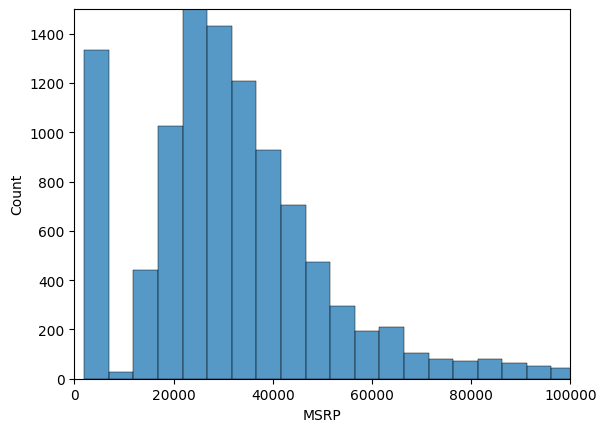

In [235]:
sns.histplot(df['MSRP'], bins=100)
plt.xlim(0, 100000)
plt.ylim(0, 1500)

<Axes: xlabel='MSRP', ylabel='Density'>

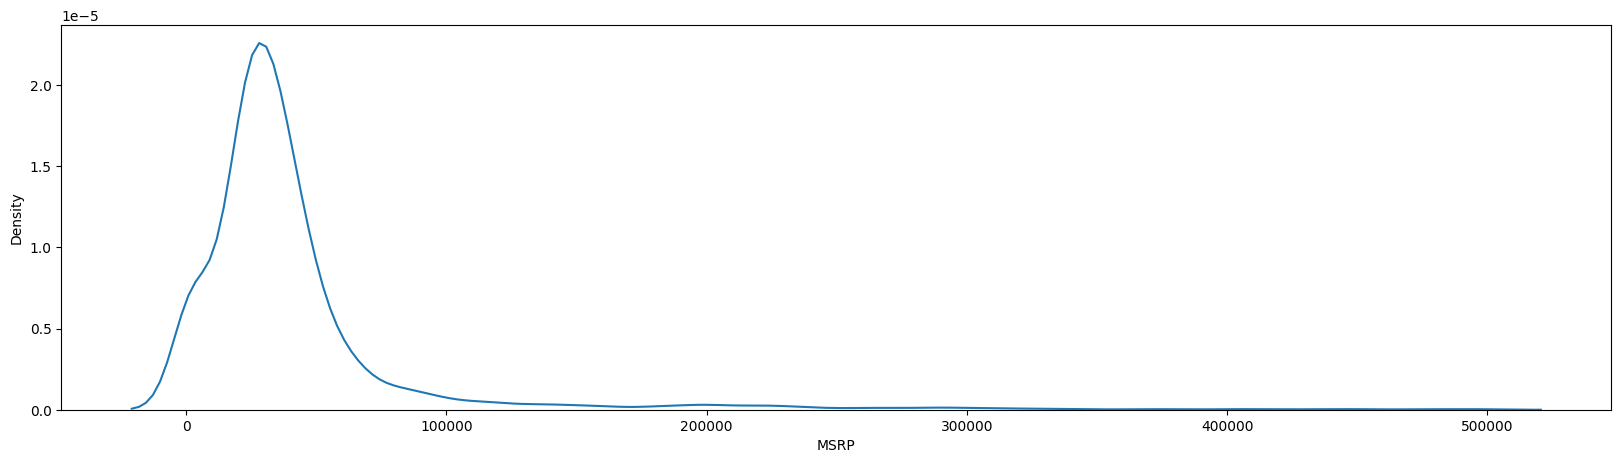

In [236]:
plt.figure(figsize=(20, 5))
sns.kdeplot(df['MSRP'])

(0.0, 100000.0)

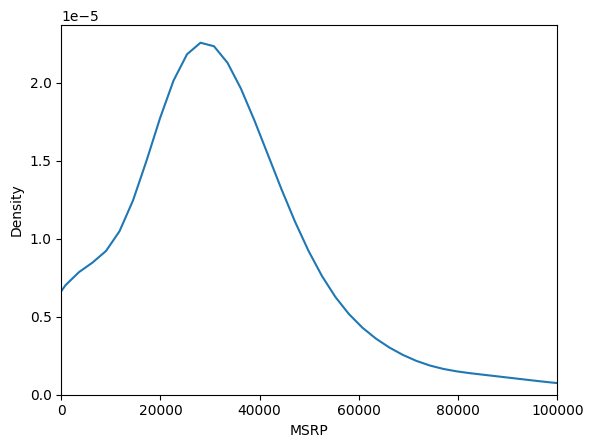

In [237]:
sns.kdeplot(df['MSRP'])
plt.xlim(0, 100000)

In [238]:
df['MSRP'].round(-4).value_counts().sort_index()

MSRP
0         1313
10000      230
20000     2243
30000     2824
40000     1817
50000      895
60000      428
70000      214
80000      161
90000      118
100000      74
110000      54
120000      52
130000      33
140000      39
150000      32
160000      23
170000      14
180000      27
190000      22
200000      41
210000      26
220000      30
230000      25
240000      15
250000       9
260000      14
270000      10
280000      16
290000      12
300000      15
310000       7
320000       9
330000       5
340000       6
350000       2
360000       3
370000       3
380000       4
390000       1
400000       4
410000       4
420000       4
430000       2
440000       6
450000       2
460000       3
470000       3
480000       3
490000       3
500000       4
Name: count, dtype: int64

In [239]:
df[df['MSRP'] < 10000].sort_values(by='MSRP')

Make     Model  Year  Engine Fuel Type  Engine HP  \
17         Audi       100  1992  regular unleaded      172.0   
6352   Plymouth     Laser  1992  regular unleaded       92.0   
6353   Plymouth     Laser  1992  regular unleaded      135.0   
6354   Plymouth     Laser  1992  regular unleaded      195.0   
6355   Plymouth     Laser  1992  regular unleaded      195.0   
...         ...       ...   ...               ...        ...   
764         BMW  8 Series  1997  regular unleaded      322.0   
761         BMW  8 Series  1995  regular unleaded      372.0   
10115    Suzuki     Swift  2001  regular unleaded       79.0   
980     Porsche       928  1995  regular unleaded      345.0   
10113    Suzuki     Swift  2001  regular unleaded       79.0   

       Engine Cylinders Transmission Type      Driven Wheels  Number of Doors  \
17                  6.0            MANUAL  front wheel drive              4.0   
6352                4.0            MANUAL  front wheel drive              2.0   
6353                4.0            MANUAL  front wheel drive              2.0   
6354                4.0            MANUAL  front wheel drive              2.0   
6355                4.0            MANUAL    all wheel drive              2.0   
...                 ...               ...                ...              ...   
764                12.0         AUTOMATIC   rear wheel drive              2.0   
761                12.0            MANUAL   rear wheel drive              2.0   
10115               4.0            MANUAL  front wheel drive              2.0   
980                 8.0            MANUAL   rear wheel drive              2.0   
10113               4.0         AUTOMATIC  front wheel drive              2.0   

                        Market Category Vehicle Size  Vehicle Style  \
17                               Luxury      Midsize          Sedan   
6352                          Hatchback      Compact  2dr Hatchback   
6353                          Hatchback      Compact  2dr Hatchback   
6354              Hatchback,Performance      Compact  2dr Hatchback   
6355              Hatchback,Performance      Compact  2dr Hatchback   
...                                 ...          ...            ...   
764                  Luxury,Performance      Midsize          Coupe   
761    Factory Tuner,Luxury,Performance      Midsize          Coupe   
10115                         Hatchback      Compact  2dr Hatchback   
980        Hatchback,Luxury,Performance      Compact  2dr Hatchback   
10113                         Hatchback      Compact  2dr Hatchback   

       Highway MPG  City MPG  Popularity  MSRP  Average MPG  
17              24        17        3105  2000         21.2  
6352            29        21         535  2000         25.8  
6353            26        19         535  2000         23.2  
6354            26        19         535  2000         23.2  
6355            23        18         535  2000         21.0  
...            ...       ...         ...   ...          ...  
764             19        12        3916  7624         16.2  
761             18        10        3916  8488         14.8  
10115           38        31         481  9299         35.2  
980             17        11        1715  9400         14.6  
10113           31        26         481  9949         29.0  

[1343 rows x 17 columns]

In [240]:
df[df['MSRP'] > 100000].sort_values(by='MSRP', ascending=False)

Make        Model  Year  \
1627     Lamborghini    Aventador  2015   
1623     Lamborghini    Aventador  2014   
9683   Mercedes-Benz  SLR McLaren  2008   
9684   Mercedes-Benz  SLR McLaren  2009   
7564     Rolls-Royce      Phantom  2016   
...              ...          ...   ...   
7548      Volkswagen      Phaeton  2005   
11729       Cadillac        XLR-V  2008   
3676   Mercedes-Benz      E-Class  2015   
8300      Land Rover  Range Rover  2014   
8302      Land Rover  Range Rover  2014   

                                Engine Fuel Type  Engine HP  Engine Cylinders  \
1627                 premium unleaded (required)      720.0              12.0   
1623                 premium unleaded (required)      720.0              12.0   
9683                 premium unleaded (required)      617.0               8.0   
9684                 premium unleaded (required)      617.0               8.0   
7564                 premium unleaded (required)      453.0              12.0   
...                                          ...        ...               ...   
7548              premium unleaded (recommended)      420.0              12.0   
11729                premium unleaded (required)      443.0               8.0   
3676                 premium unleaded (required)      577.0               8.0   
8300   flex-fuel (premium unleaded required/E85)      510.0               8.0   
8302                 premium unleaded (required)      510.0               8.0   

      Transmission Type     Driven Wheels  Number of Doors  \
1627   AUTOMATED_MANUAL   all wheel drive              2.0   
1623   AUTOMATED_MANUAL   all wheel drive              2.0   
9683          AUTOMATIC  rear wheel drive              2.0   
9684          AUTOMATIC  rear wheel drive              2.0   
7564          AUTOMATIC  rear wheel drive              4.0   
...                 ...               ...              ...   
7548          AUTOMATIC   all wheel drive              4.0   
11729         AUTOMATIC  rear wheel drive              2.0   
3676          AUTOMATIC   all wheel drive              4.0   
8300          AUTOMATIC  four wheel drive              4.0   
8302          AUTOMATIC  four wheel drive              4.0   

                                    Market Category Vehicle Size  \
1627                        Exotic,High-Performance      Midsize   
1623                        Exotic,High-Performance      Midsize   
9683   Exotic,Factory Tuner,Luxury,High-Performance      Compact   
9684   Exotic,Factory Tuner,Luxury,High-Performance      Compact   
7564                      Exotic,Luxury,Performance        Large   
...                                             ...          ...   
7548                             Luxury,Performance        Large   
11729         Factory Tuner,Luxury,High-Performance      Compact   
3676          Factory Tuner,Luxury,High-Performance      Midsize   
8300              Flex Fuel,Luxury,High-Performance        Large   
8302                        Luxury,High-Performance        Large   

      Vehicle Style  Highway MPG  City MPG  Popularity    MSRP  Average MPG  
1627          Coupe           18        11        1158  497650         15.2  
1623          Coupe           18        11        1158  497650         15.2  
9683    Convertible           16        12         617  495000         14.4  
9684    Convertible           16        12         617  495000         14.4  
7564          Sedan           19        11          86  492425         15.8  
...             ...          ...       ...         ...     ...          ...  
7548          Sedan           17        11         873  100800         14.6  
11729   Convertible           21        14        1624  100660         18.2  
3676          Sedan           22        15         617  100600         19.2  
8300        4dr SUV           19        13         258  100100         16.6  
8302        4dr SUV           19        13         258  100100         16.6  

[616 rows x 17 columns]

<Axes: xlabel='MSRP'>

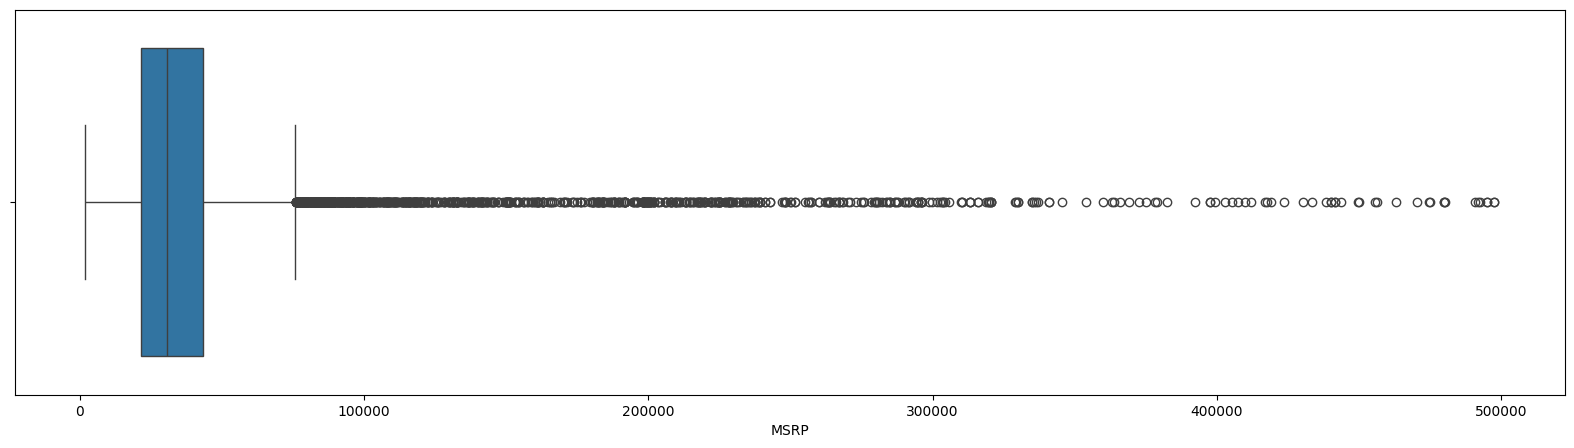

In [241]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['MSRP'])

(0.0, 100000.0)

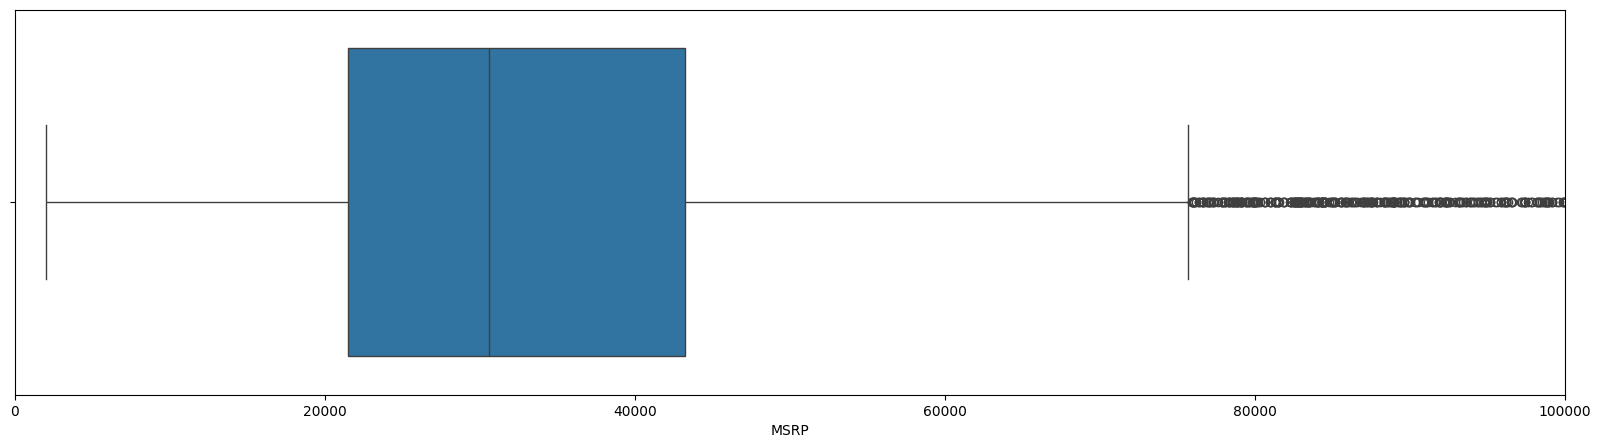

In [242]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['MSRP'])
plt.xlim(0, 100000)

- most cars are under $50k, heavy concentration in the $20-40k range
- right skewed distribution - lots of budget/mid-range cars, fewer luxury
- some extreme outliers above $100k (luxury/exotic cars)
- median looks around $30k-ish
- budget cars under $10k are mostly older/basic models

### MPG

(0.0, 120.0)

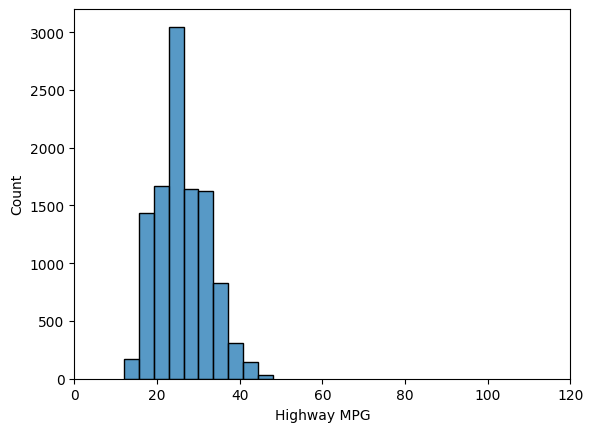

In [243]:
sns.histplot(df['Highway MPG'], bins=10)
plt.xlim(0, 120)

(0.0, 120.0)

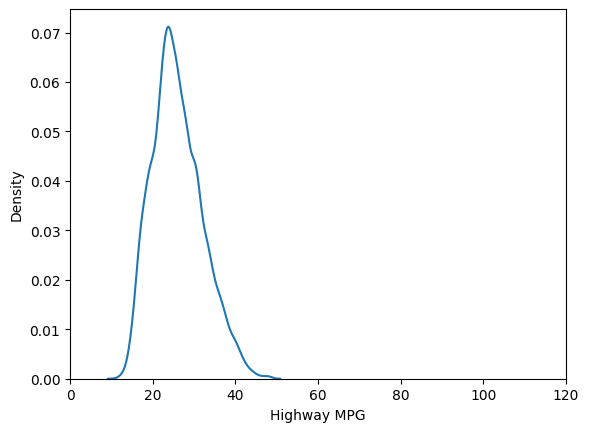

In [244]:
sns.kdeplot(df['Highway MPG'])
plt.xlim(0, 120)

<Axes: xlabel='Highway MPG'>

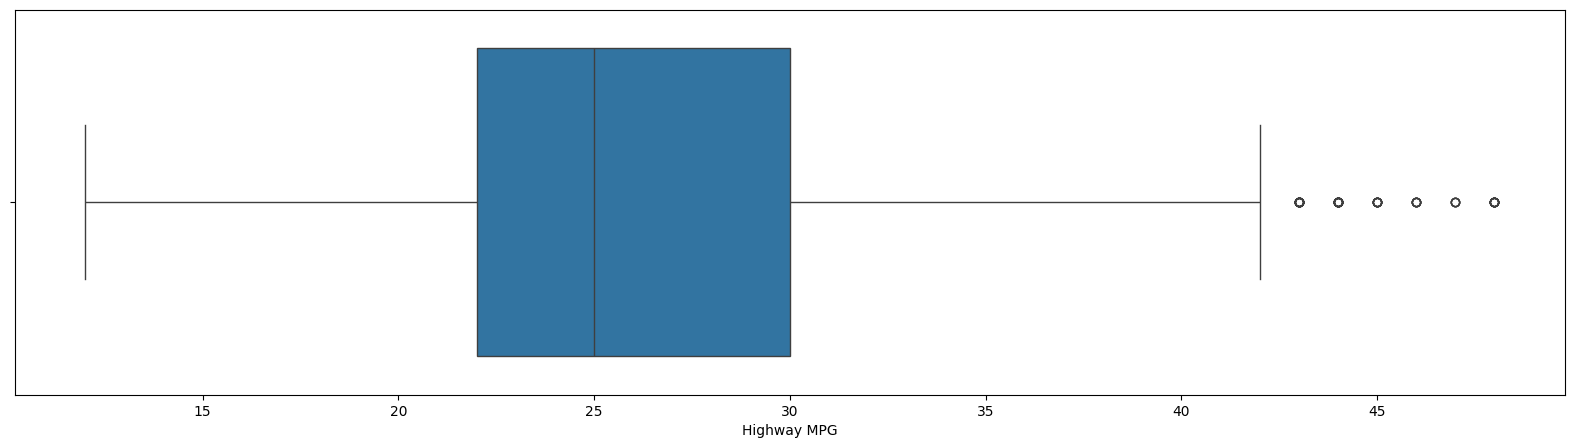

In [245]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['Highway MPG'])

(0.0, 120.0)

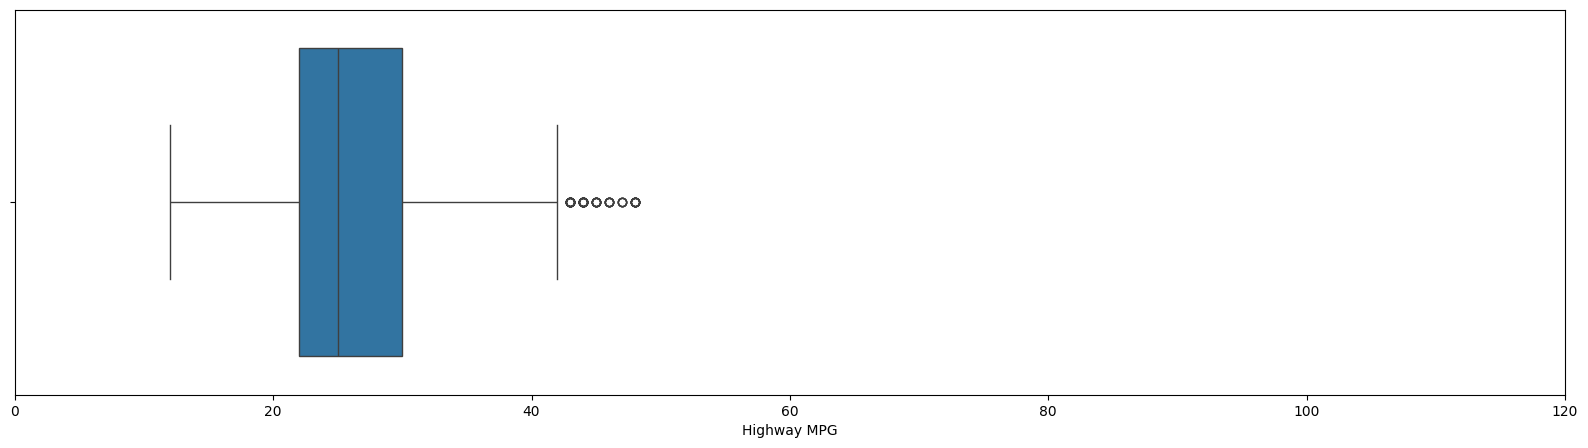

In [246]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['Highway MPG'])
plt.xlim(0, 120)

(0.0, 60.0)

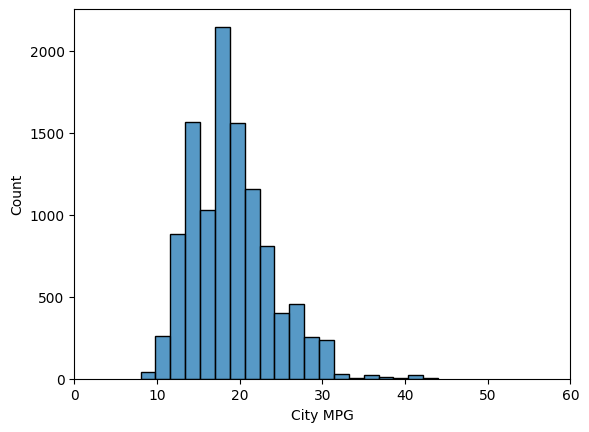

In [247]:
sns.histplot(df['City MPG'], bins=20)
plt.xlim(0, 60)

(0.0, 60.0)

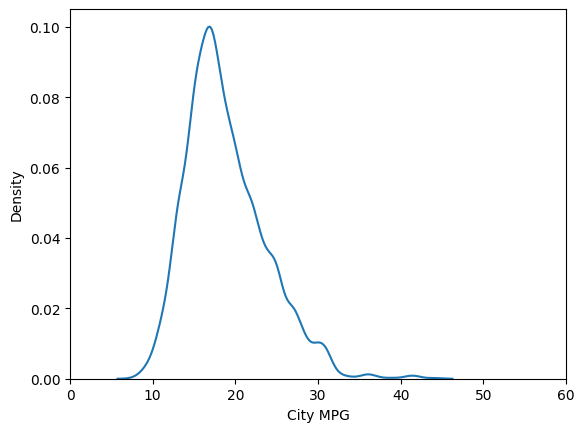

In [248]:
sns.kdeplot(df['City MPG'])
plt.xlim(0, 60)

<Axes: xlabel='Highway MPG'>

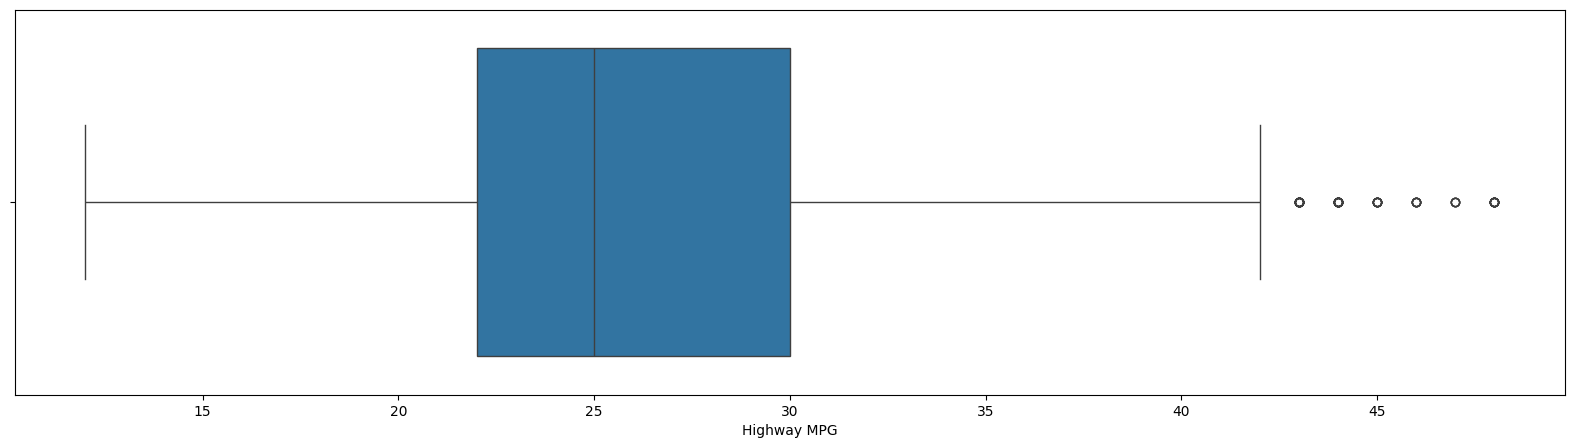

In [249]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['Highway MPG'])

(0.0, 120.0)

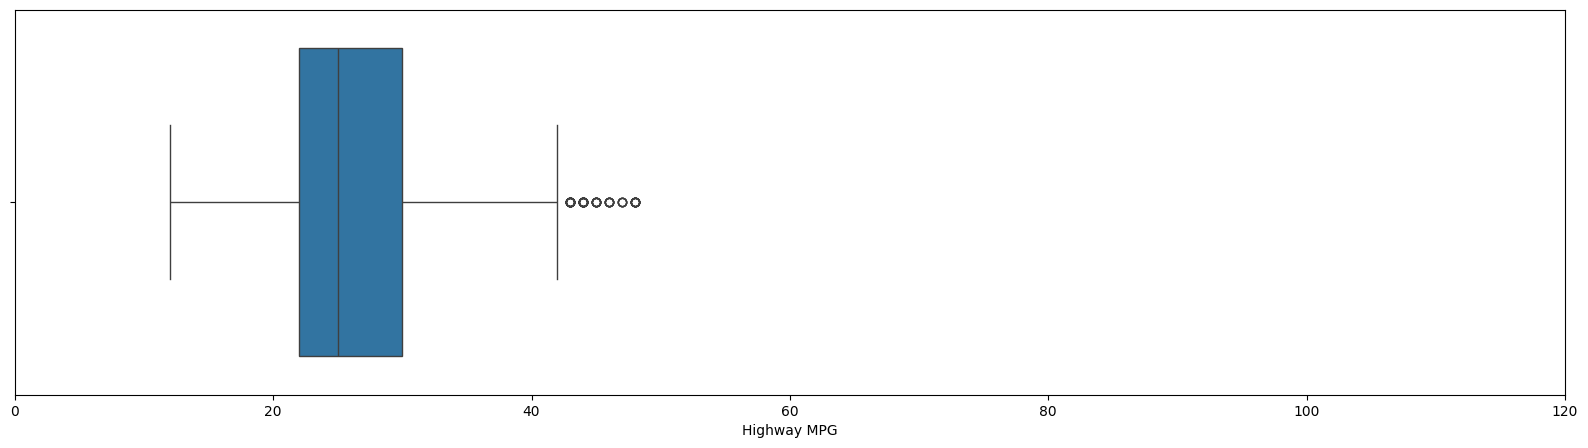

In [250]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['Highway MPG'])
plt.xlim(0, 120)

(0.0, 60.0)

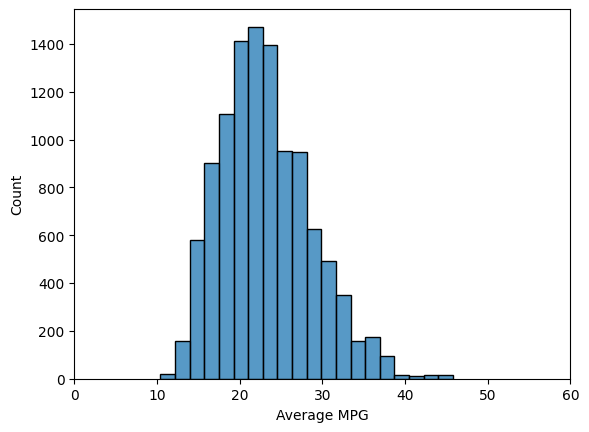

In [251]:
sns.histplot(df['Average MPG'], bins=20)
plt.xlim(0, 60)

(0.0, 60.0)

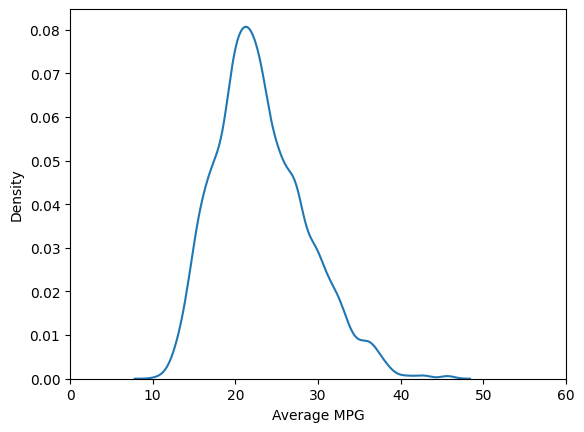

In [252]:
sns.kdeplot(df['Average MPG'])
plt.xlim(0, 60)

<Axes: xlabel='Average MPG'>

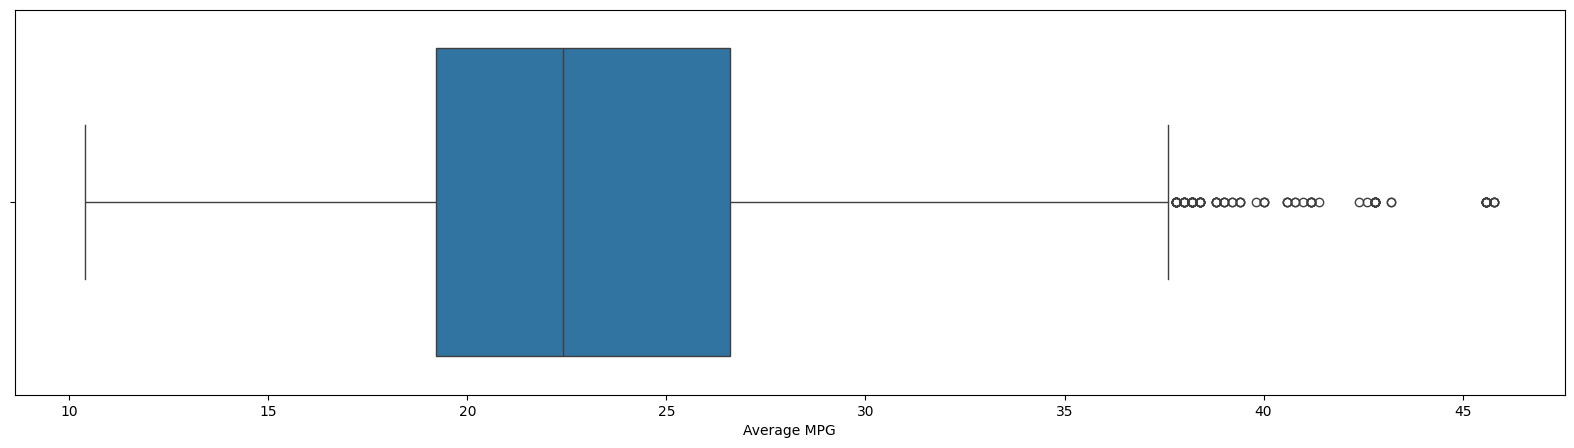

In [253]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['Average MPG'])

(0.0, 60.0)

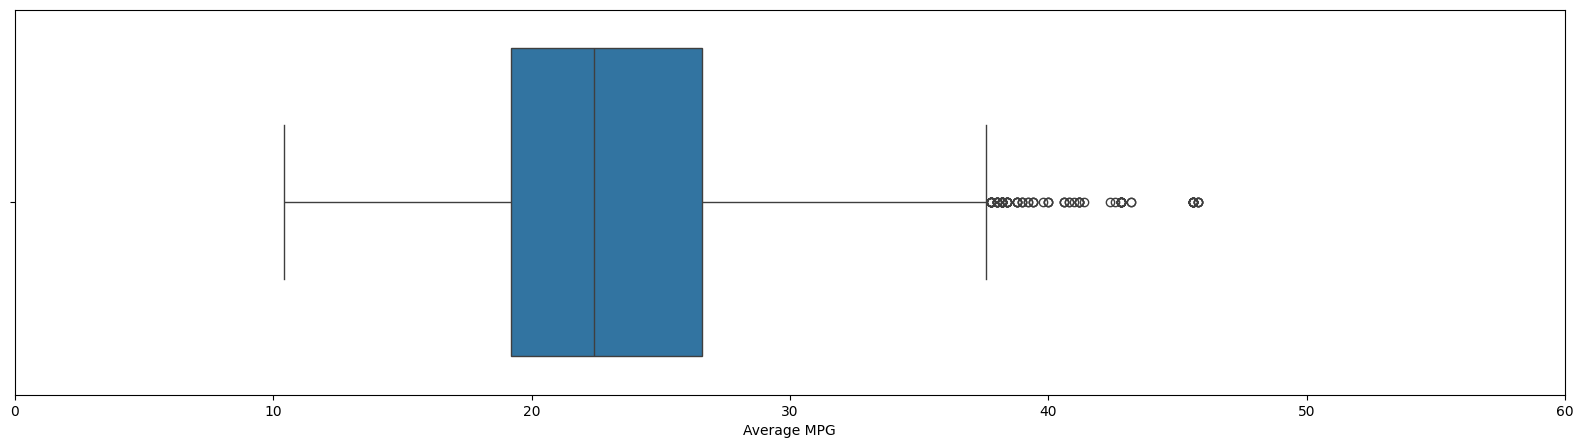

In [254]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['Average MPG'])
plt.xlim(0, 60)

- highway mpg centers around 25-30, pretty normal distribution
- city mpg lower as expected, around 20-25 range
- average mpg (weighted 60% highway, 40% city) centers around 27-30 mpg range
- some really efficient cars getting 50+ mpg
- few gas cars under 15 mpg
- highway always higher than city (expected)

### Year

<Axes: xlabel='Year', ylabel='Count'>

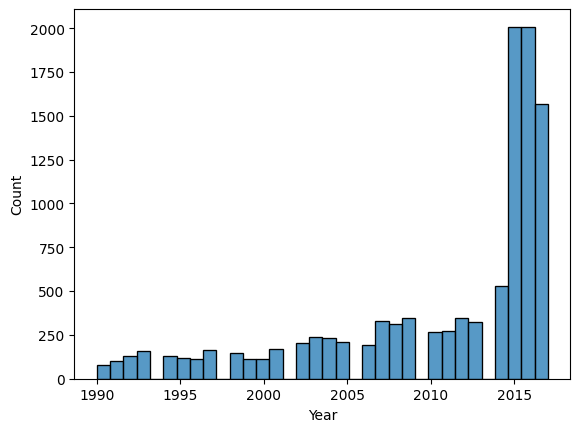

In [255]:
sns.histplot(df['Year'])

- dataset mostly covers 2010-2017 timeframe
- peak around 2015-2016, newer cars more represented
- reasonable since newer models have more complete data
- missing really old cars (pre-2000) and very new ones

### Engine HP / Engine Cylinders

<Axes: xlabel='Engine HP', ylabel='Count'>

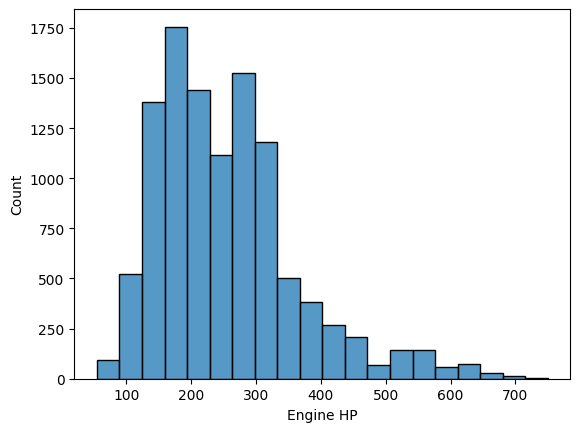

In [256]:
sns.histplot(df['Engine HP'], bins=20)

<Axes: xlabel='Engine HP', ylabel='Density'>

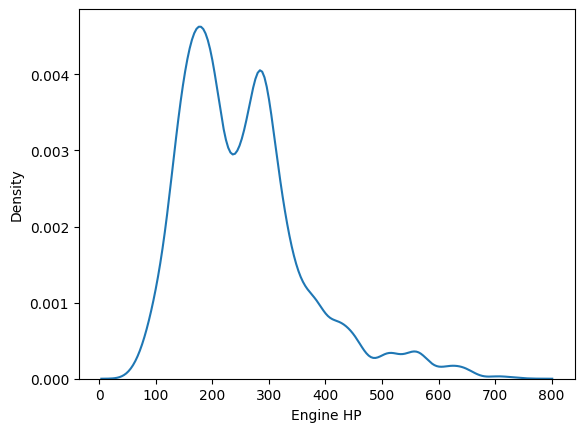

In [257]:
sns.kdeplot(df['Engine HP'])

<Axes: xlabel='Engine Cylinders', ylabel='Count'>

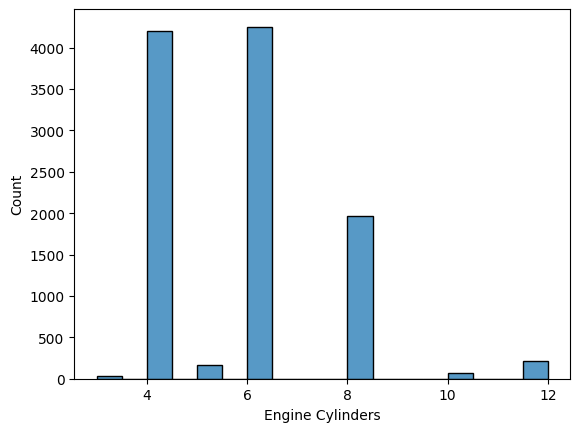

In [258]:
sns.histplot(df['Engine Cylinders'], binwidth=0.5)

- hp peaks around 200-300, most cars are mid-range power
- cylinders heavily concentrated at 4 and 6 cylinders
- 4 cylinder dominates (economy cars), 6 cylinder second (mid-size)
- 8+ cylinders less common (trucks, luxury, sports cars)
- aligns with fuel efficiency trends

### Popularity

In [259]:
df['Popularity'].value_counts()

Popularity
1385    1067
5657     784
2031     647
873      564
2009     539
1851     528
549      478
2202     421
1624     396
586      384
481      339
617      337
190      328
3105     320
3916     320
870      266
1439     259
204      244
640      239
1720     224
436      205
155      190
1013     185
210      178
454      172
61       147
258      139
1715     136
26       130
376      109
259       91
520       74
535       71
2774      67
105       60
819       59
238       55
1158      48
86        31
613       28
130       17
67        13
416        5
113        5
21         3
2          2
Name: count, dtype: int64

<Axes: xlabel='Popularity', ylabel='Count'>

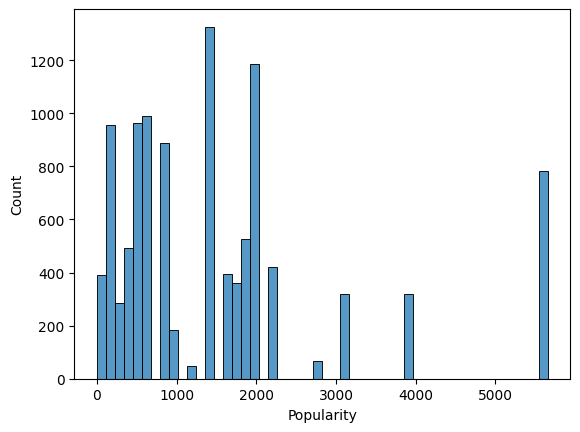

In [260]:
sns.histplot(df['Popularity'], bins=50)

- most cars have low popularity scores (under 1000)
- few models are really popular (over 3000)
- right skewed like price - most cars niche, few mainstream hits
- popularity likely correlates with sales volume

## Categorical Values

### Make

In [261]:
df['Make'].value_counts().sort_values()

Make
Spyker              2
Genesis             3
McLaren             5
Alfa Romeo          5
Maybach            13
HUMMER             17
Lotus              28
Rolls-Royce        31
Lamborghini        48
Maserati           55
FIAT               59
Scion              60
Ferrari            67
Plymouth           71
Bentley            74
Aston Martin       91
Saab              109
Oldsmobile        130
Porsche           136
Land Rover        139
Lincoln           147
Lexus             172
Pontiac           178
Chrysler          185
Buick             190
Mitsubishi        205
Kia               224
Subaru            239
Acura             244
Hyundai           259
Volvo             266
BMW               320
Audi              320
Infiniti          328
Mercedes-Benz     337
Suzuki            339
Mazda             384
Cadillac          396
Honda             421
GMC               478
Dodge             528
Nissan            539
Volkswagen        564
Toyota            647
Ford              784
Chevr

<Axes: xlabel='count', ylabel='Make'>

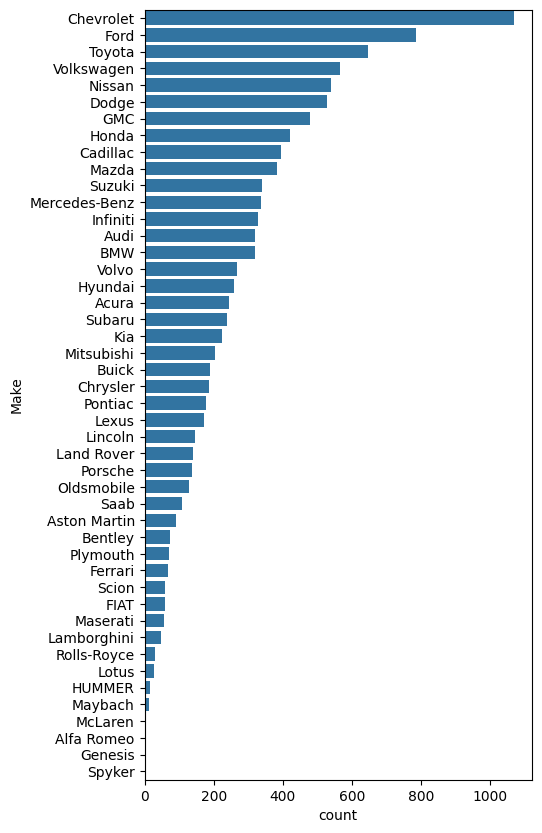

In [262]:
plt.figure(figsize=(5, 10))
sns.countplot(y=df['Make'], order=df['Make'].value_counts().index)

- chevrolet dominates the dataset by count
- ford, volkswagen, toyota, dodge also well represented
- lots of luxury brands with fewer models (ferrari, maserati, etc.)
- american and japanese brands seem most common
- european luxury brands present but smaller volume

### Transmission Type

In [263]:
df['Transmission Type'].value_counts().sort_values()

Transmission Type
AUTOMATED_MANUAL     543
MANUAL              2621
AUTOMATIC           7740
Name: count, dtype: int64

<Axes: xlabel='Transmission Type', ylabel='count'>

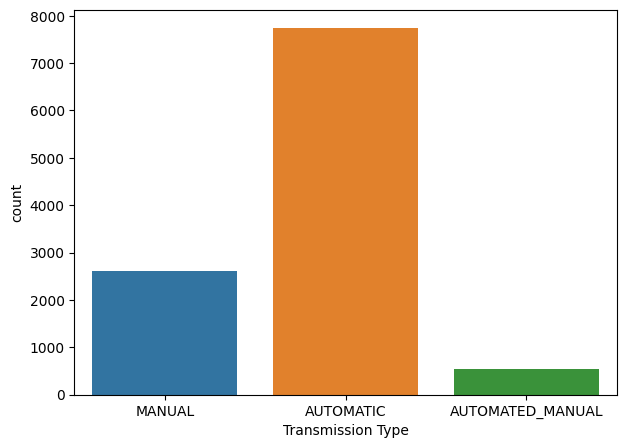

In [264]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df['Transmission Type'], hue=df['Transmission Type'])

<Axes: ylabel='count'>

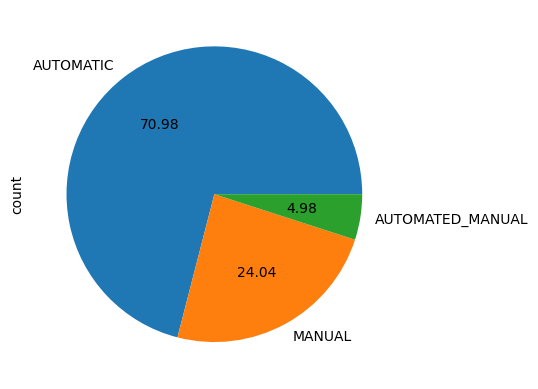

In [265]:
df['Transmission Type'].value_counts().plot(kind='pie', autopct='%.2f')

- automatic dominates (~70%+) (likely due to convenience)
- manual has decent representation (~25%) - enthusiasts and budget cars
- automated manual relatively small slice - newer tech, less common
- reflects market preference for automatic transmissions

### Vehicle Size/Style

In [266]:
df['Vehicle Size'].value_counts().sort_values()

Vehicle Size
Large      2650
Midsize    4004
Compact    4250
Name: count, dtype: int64

<Axes: xlabel='Vehicle Size', ylabel='count'>

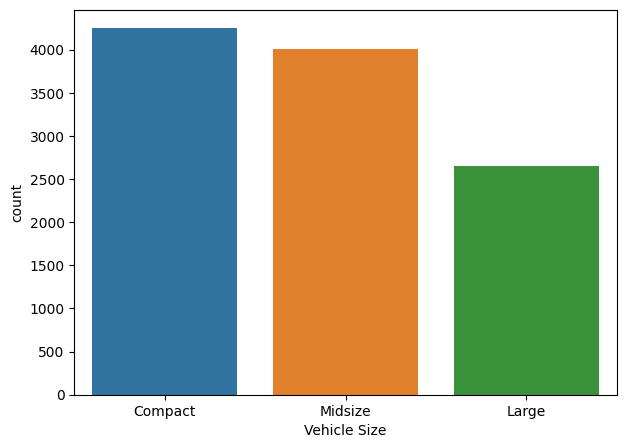

In [267]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df['Vehicle Size'], hue=df['Vehicle Size'])

<Axes: ylabel='count'>

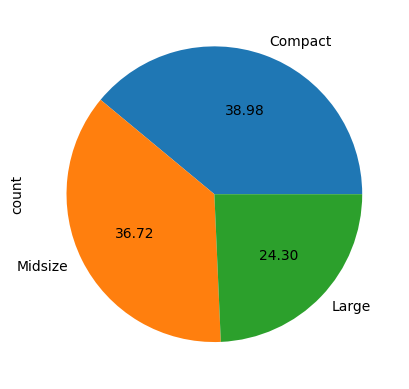

In [268]:
df['Vehicle Size'].value_counts().plot(kind='pie', autopct='%.2f')

In [269]:
df['Vehicle Style'].value_counts().sort_values()

Vehicle Style
Convertible SUV          28
Cargo Minivan            58
Cargo Van                84
2dr SUV                  87
Passenger Van           121
Regular Cab Pickup      344
Passenger Minivan       384
2dr Hatchback           407
Wagon                   539
4dr Hatchback           589
Extended Cab Pickup     597
Crew Cab Pickup         655
Convertible             734
Coupe                  1147
4dr SUV                2383
Sedan                  2747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Vehicle Style'>

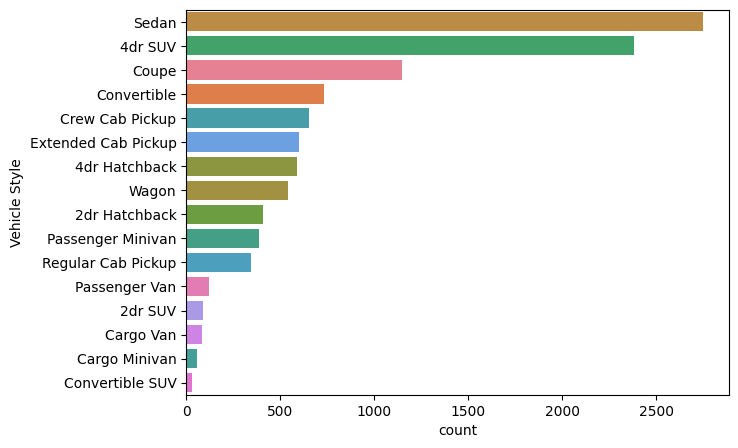

In [270]:
plt.figure(figsize=(7, 5))
sns.countplot(y=df['Vehicle Style'], hue=df['Vehicle Style'], order=df['Vehicle Style'].value_counts().index)

<Axes: >

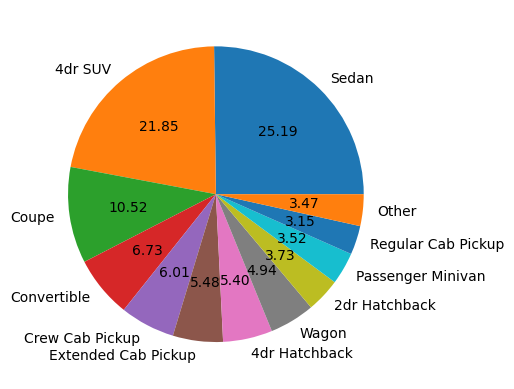

In [271]:
counts = df['Vehicle Style'].value_counts()
percentages = counts / counts.sum()

counts_modified = counts[percentages >= 0.02]
counts_modified['Other'] = counts[percentages < 0.02].sum()

counts_modified.plot(kind='pie', autopct='%.2f', ylabel='')

- midsize cars dominate, then compact - practical family choices
- large cars much less common (gas prices, parking, etc.)
- sedan most popular style, then suv/coupe
- convertibles, wagons are niche markets
- reflects american preference for midsize practical vehicles

### Engine Fuel Type

<Axes: ylabel='Engine Fuel Type'>

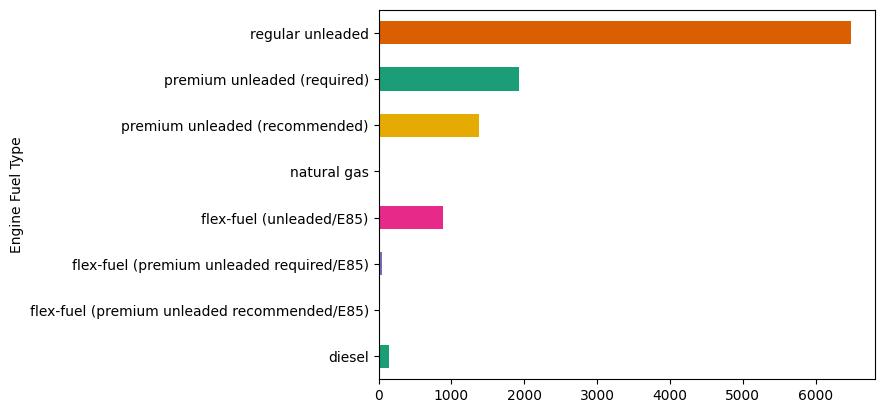

In [272]:
df.groupby('Engine Fuel Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

- regular unleaded dominates (likely since cheapest/most common)
- premium unleaded second (performance/luxury cars)
- flex fuel decent reprsentation (ethanol capability)
- diesel, electric very small portions - dataset probably pre-ev boom

### Driven Wheels

<Axes: ylabel='Driven Wheels'>

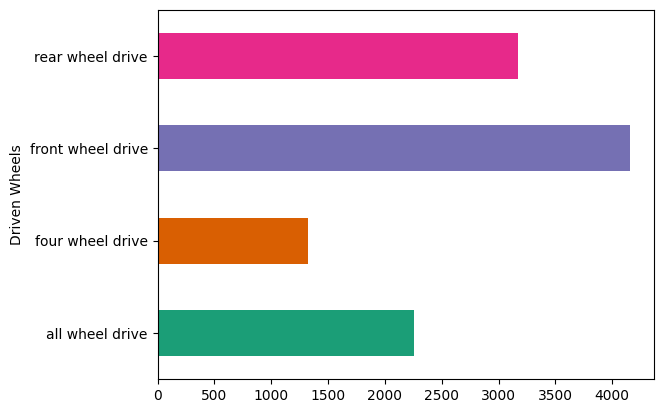

In [273]:
df.groupby('Driven Wheels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='count'>

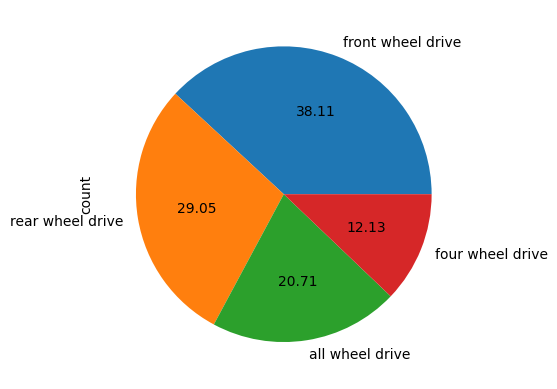

In [274]:
df['Driven Wheels'].value_counts().plot(kind='pie', autopct='%.2f')

- front wheel drive dominates (~60%) - cheaper, better mpg
- all wheel drive second (~25%) - safety, weather, suvs
- rear wheel drive smaller slice (~15%) - performance, trucks
- reflects practical priorities over performance for most buyers

# Bivariate / Multivariate Analysis

## Correlation Analysis

In [275]:
corr_matrix = df.select_dtypes(include='number').corr()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

correlation_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False)

strongest_positive = correlation_pairs[correlation_pairs > 0]
strongest_negative = correlation_pairs[correlation_pairs < 0]

print(strongest_positive, '\n\n', strongest_negative)

Average MPG       Highway MPG         0.993523
                  City MPG            0.976829
City MPG          Highway MPG         0.946182
Engine Cylinders  Engine HP           0.784542
MSRP              Engine HP           0.736647
                  Engine Cylinders    0.611341
Engine HP         Year                0.350564
Highway MPG       Year                0.297330
Average MPG       Year                0.283302
MSRP              Year                0.270616
City MPG          Year                0.246860
Number of Doors   Year                0.240694
City MPG          Number of Doors     0.129234
Average MPG       Number of Doors     0.119601
Highway MPG       Number of Doors     0.112241
Popularity        Year                0.083001
                  Engine Cylinders    0.055102
                  Engine HP           0.050343
dtype: float64 

 Engine Cylinders  Year               -0.017532
MSRP              Popularity         -0.049222
Popularity        City MPG           -0.05

<Axes: >

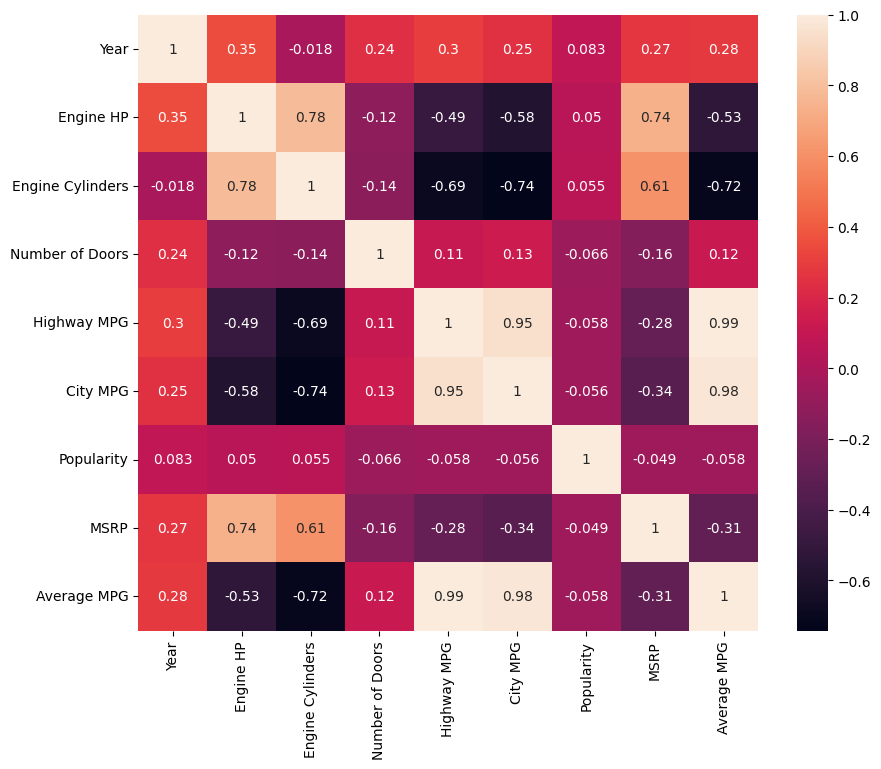

In [276]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

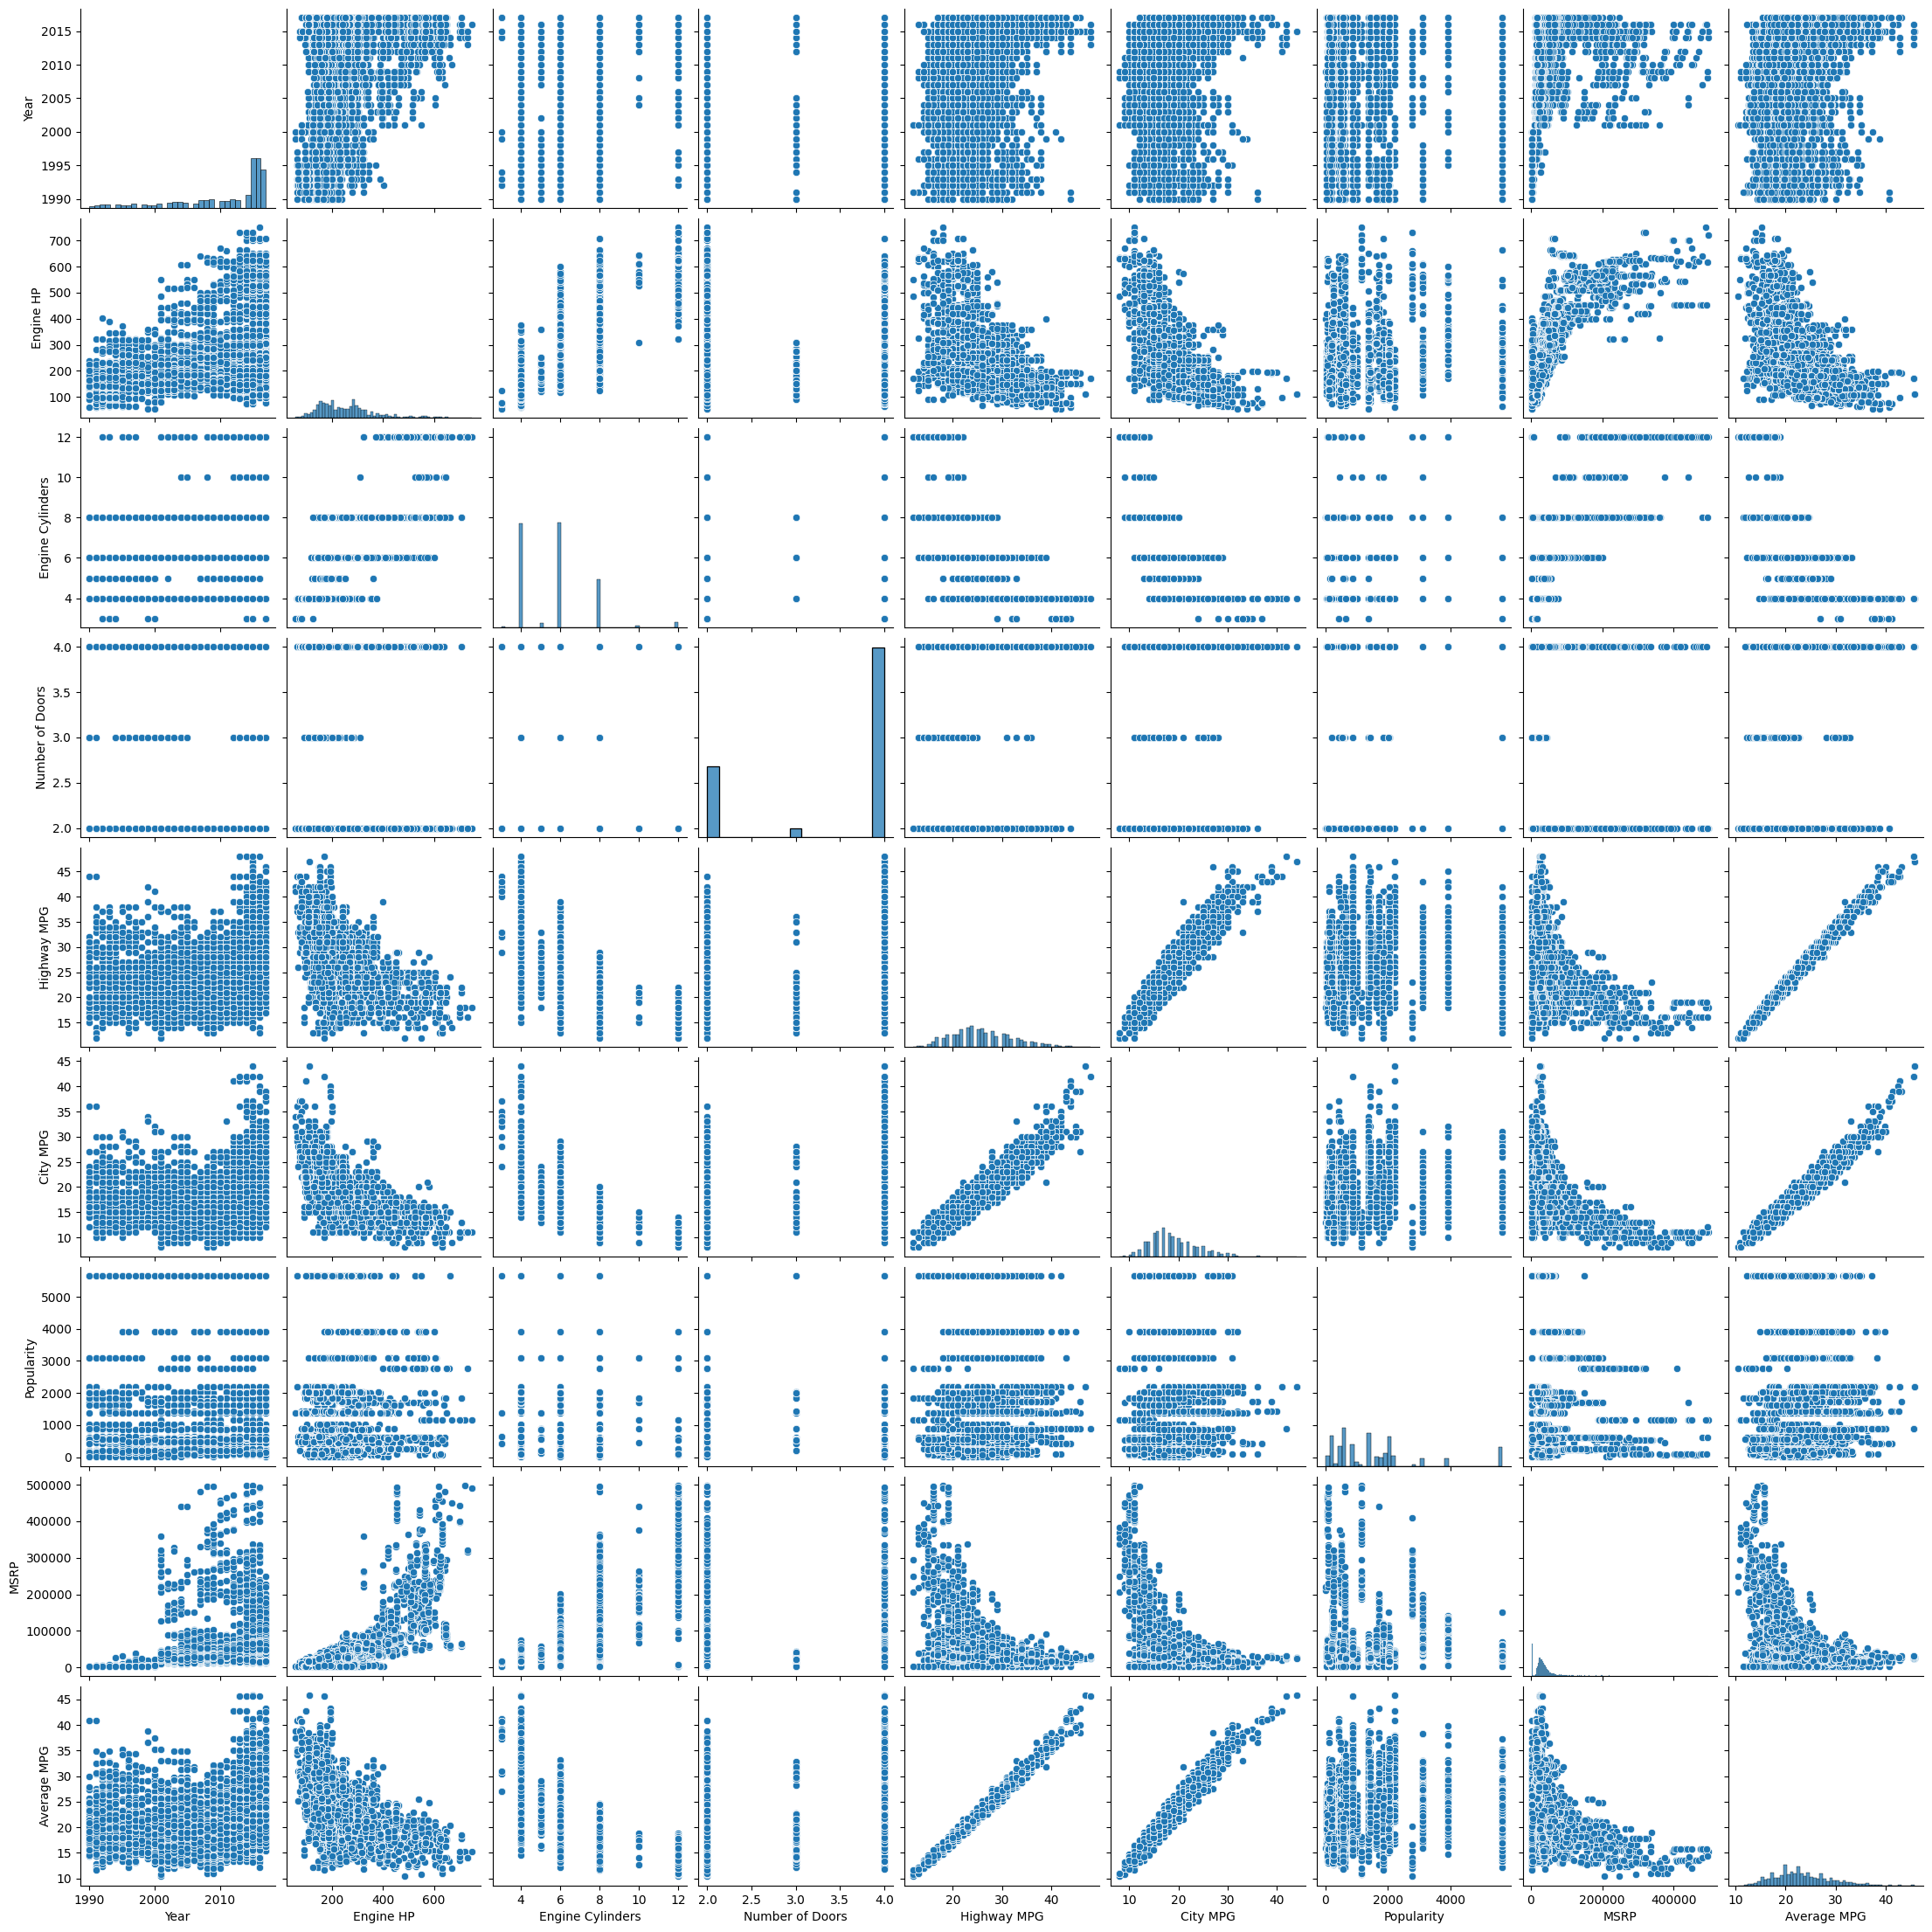

In [277]:
sns.pairplot(df.select_dtypes(include='number'))

- strong positive: engine hp & cylinders (bigger engines = more power)
- strong negative: mpg & hp/cylinders (power vs efficiency tradeoff)
- moderate positive: msrp & hp (performance costs money)
- city/highway mpg highly correlated (expected)
- year weakly correlated with most things

## MSRP vs Average MPG

<Axes: xlabel='MSRP', ylabel='Average MPG'>

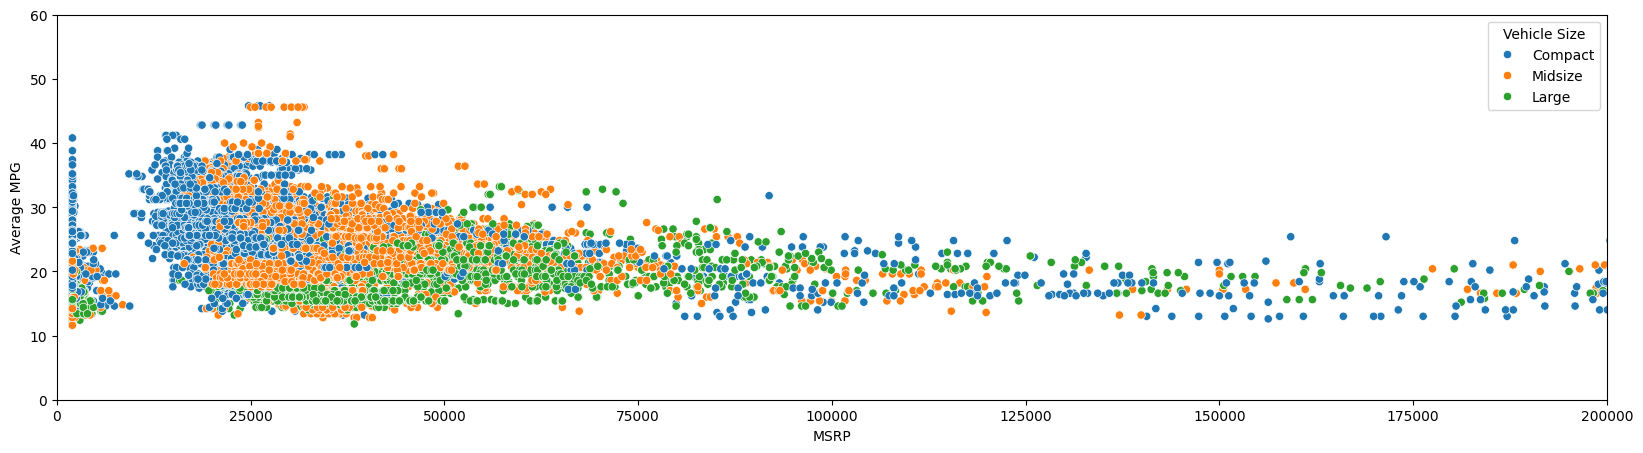

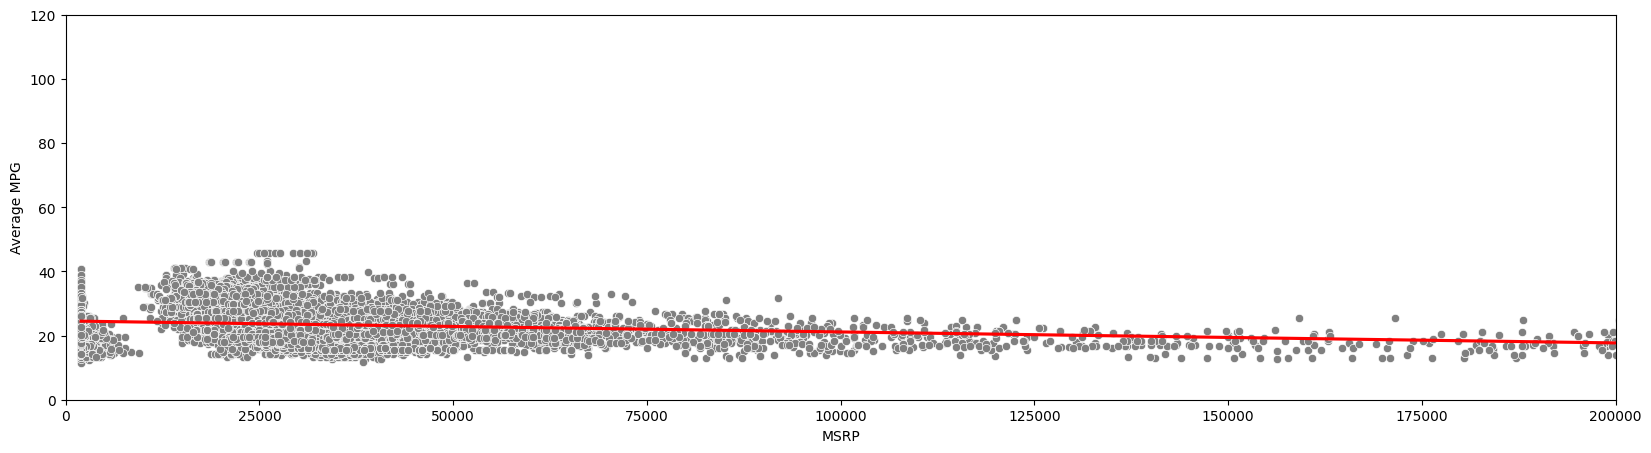

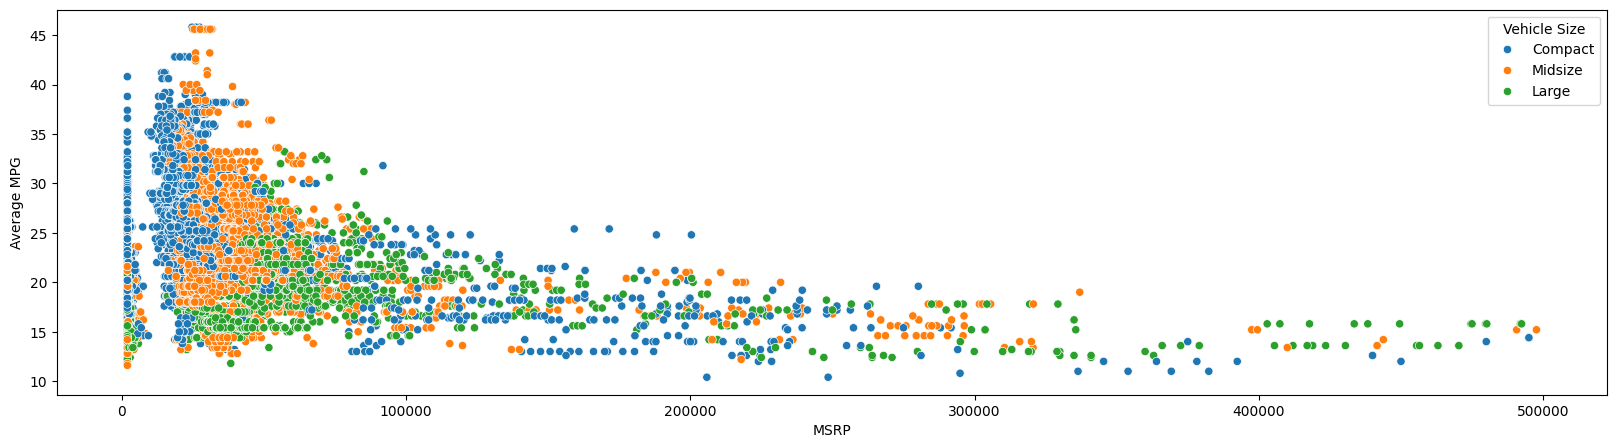

In [278]:
feat1 = 'MSRP'
feat2 = 'Average MPG'

plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x=feat1, y=feat2, hue='Vehicle Size')
plt.xlim(0, 200000)
plt.ylim(0, 60)

plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x=feat1, y=feat2, color='gray')
sns.regplot(data=df, x=feat1, y=feat2, scatter=False, color='red')
plt.xlim(0, 200000)
plt.ylim(0, 120)

plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x=feat1, y=feat2, hue='Vehicle Size')

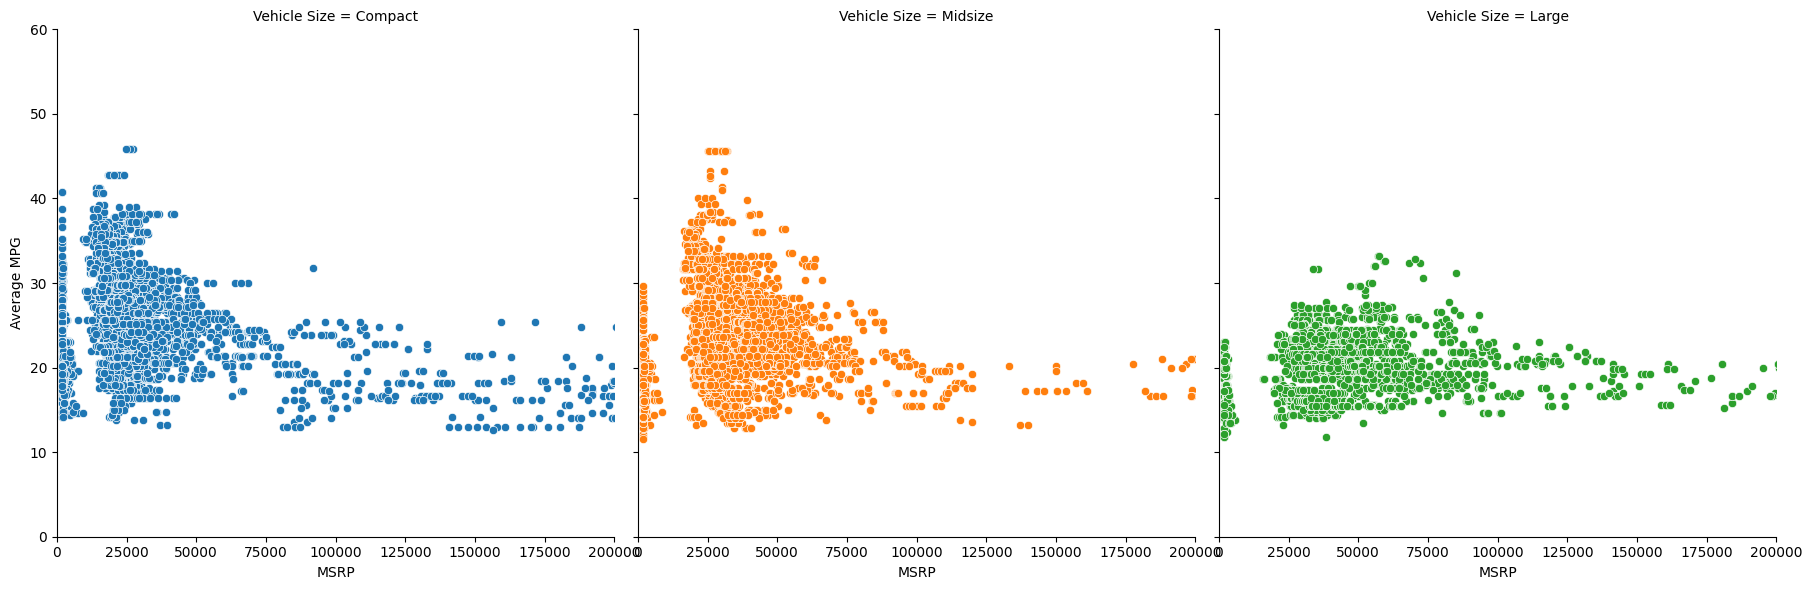

In [279]:
sns.FacetGrid(df, col='Vehicle Size', hue='Vehicle Size', height=6).map(sns.scatterplot, 'MSRP', 'Average MPG').set(xlim=(0, 200000), ylim=(0, 60))

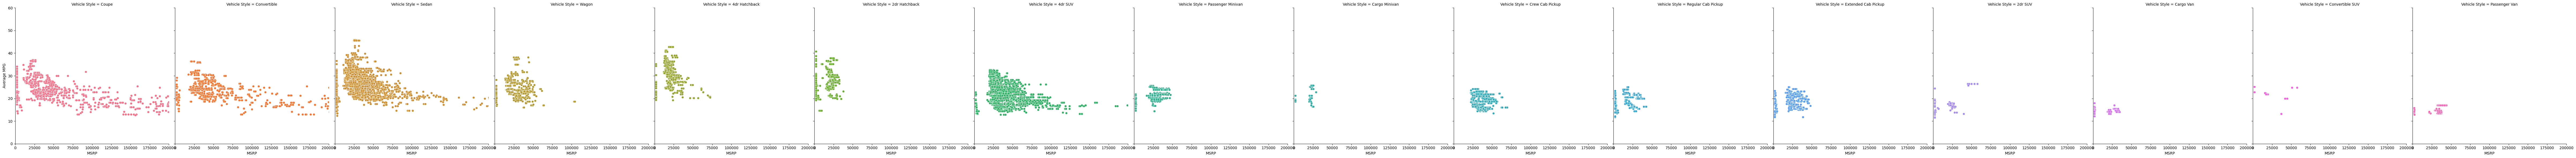

In [280]:
sns.FacetGrid(df, col='Vehicle Style', hue='Vehicle Style', height=6).map(sns.scatterplot, 'MSRP', 'Average MPG').set(xlim=(0, 200000), ylim=(0, 60))

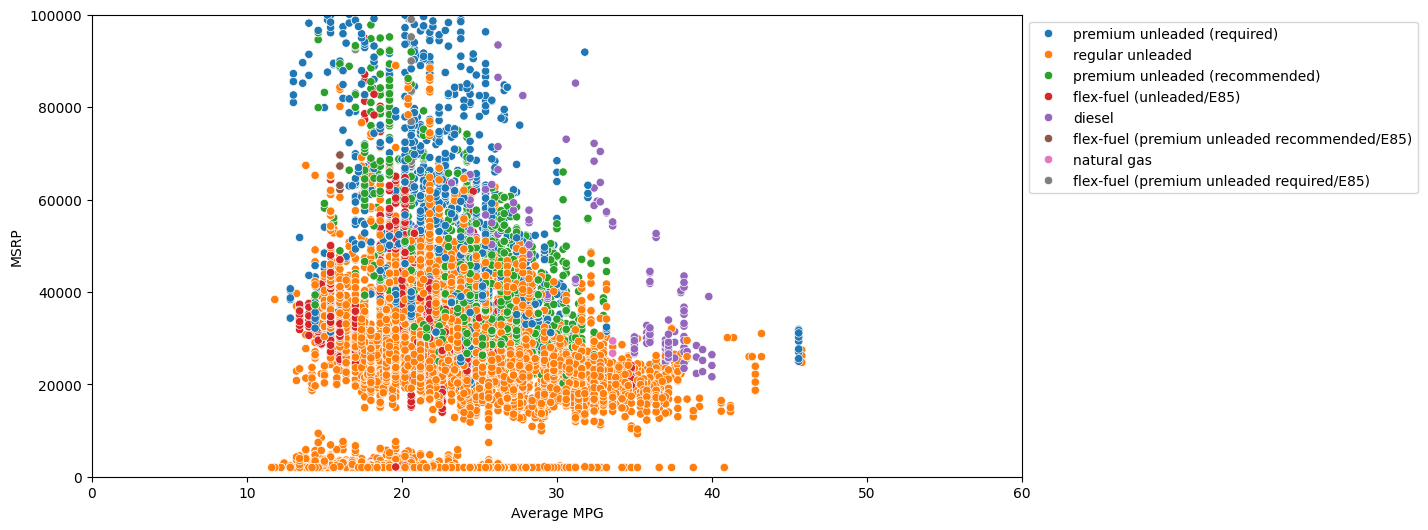

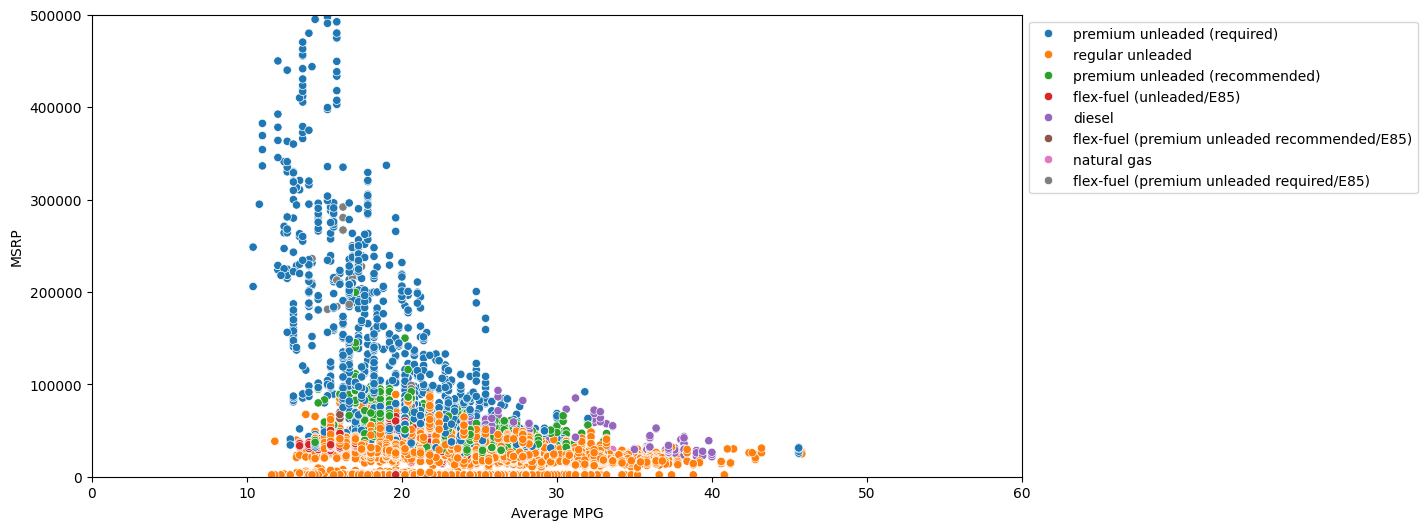

In [281]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Average MPG', y='MSRP', hue='Engine Fuel Type')
plt.xlim(0, 60)
plt.ylim(0, 100000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Average MPG', y='MSRP', hue='Engine Fuel Type')
plt.xlim(0, 60)
plt.ylim(0, 500000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

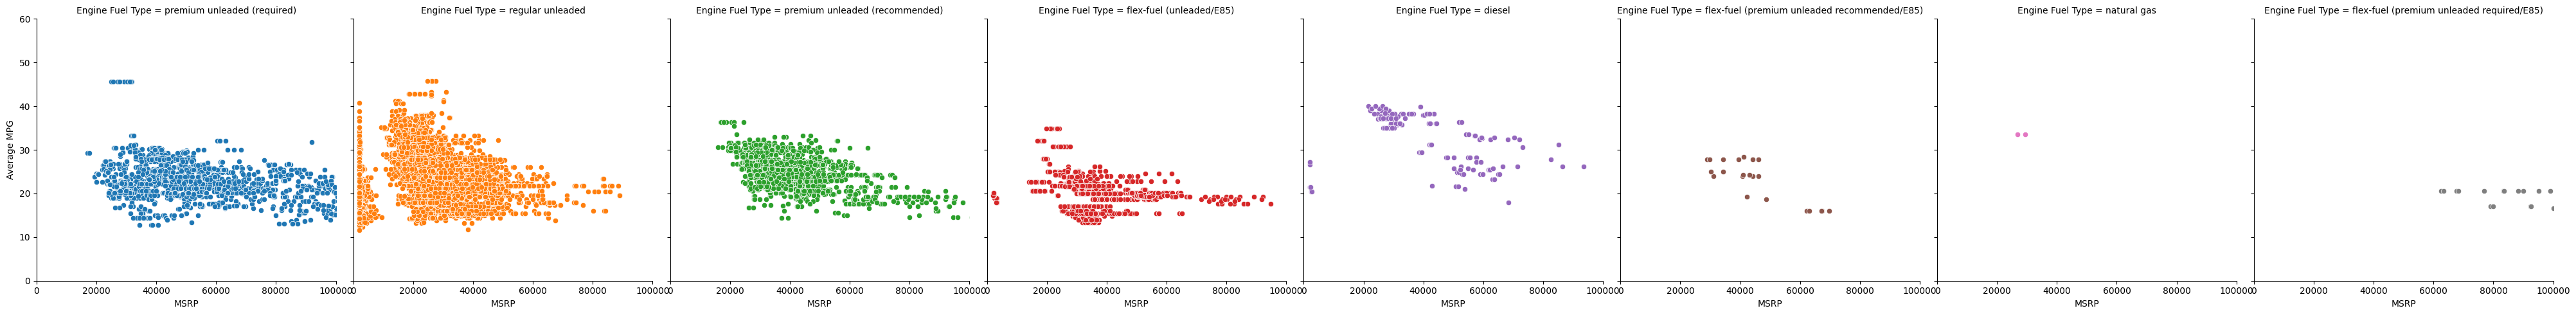

In [282]:
sns.FacetGrid(df, col='Engine Fuel Type', hue='Engine Fuel Type', height=5).map(sns.scatterplot, 'MSRP', 'Average MPG').set(xlim=(0, 100000), ylim=(0, 60))

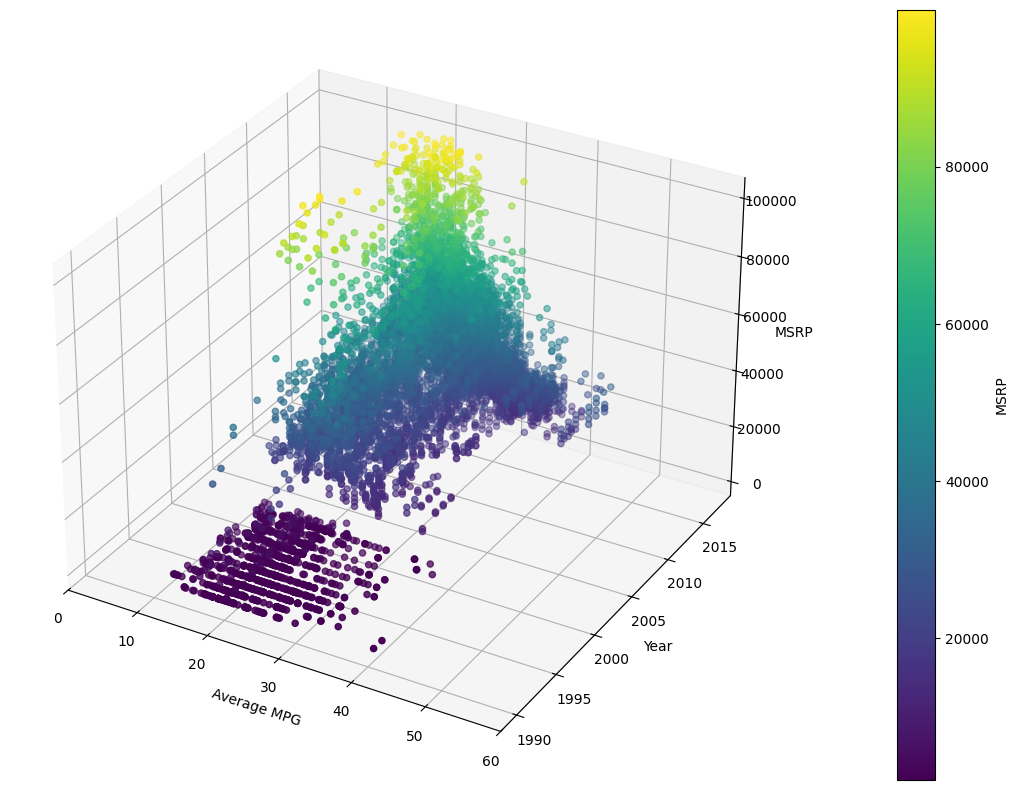

In [283]:
df_filtered = df[df['MSRP'] < 100000]

df_plot = df_filtered[['Average MPG', 'Year', 'MSRP']]
x = df_plot['Average MPG']
y = df_plot['Year']
z = df_plot['MSRP']
color_values = z

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=color_values)

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('MSRP')

ax.set_xlim(0, 60)

ax.set_xlabel('Average MPG')
ax.set_ylabel('Year')
ax.set_zlabel('MSRP')

plt.tight_layout()
plt.show()

- clear negative trend: higher price = lower mpg (luxury/performance prioritized over efficiency)
- compact cars cluster high mpg, low price (practical choice)
- large cars expensive with poor mpg (luxury suvs, trucks)
- luxury cars sacrifice efficiency for performance/comfort

## MSRP by Vehicle Size

(0.0, 200000.0)

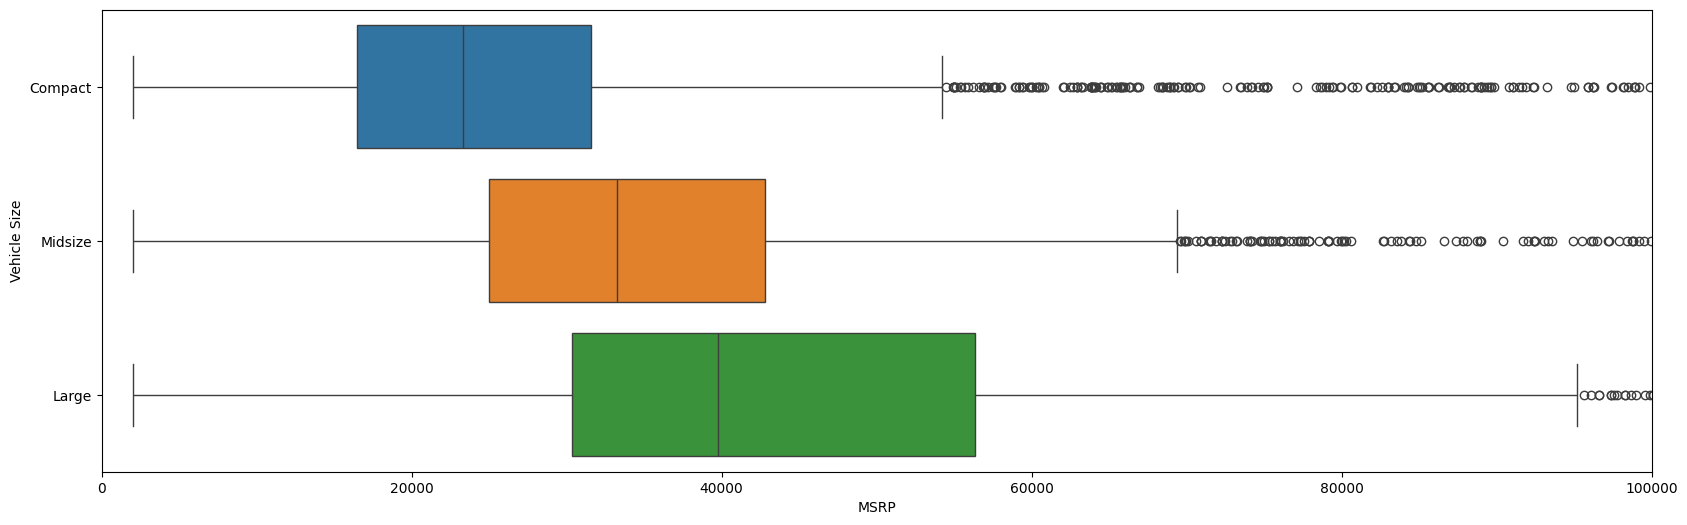

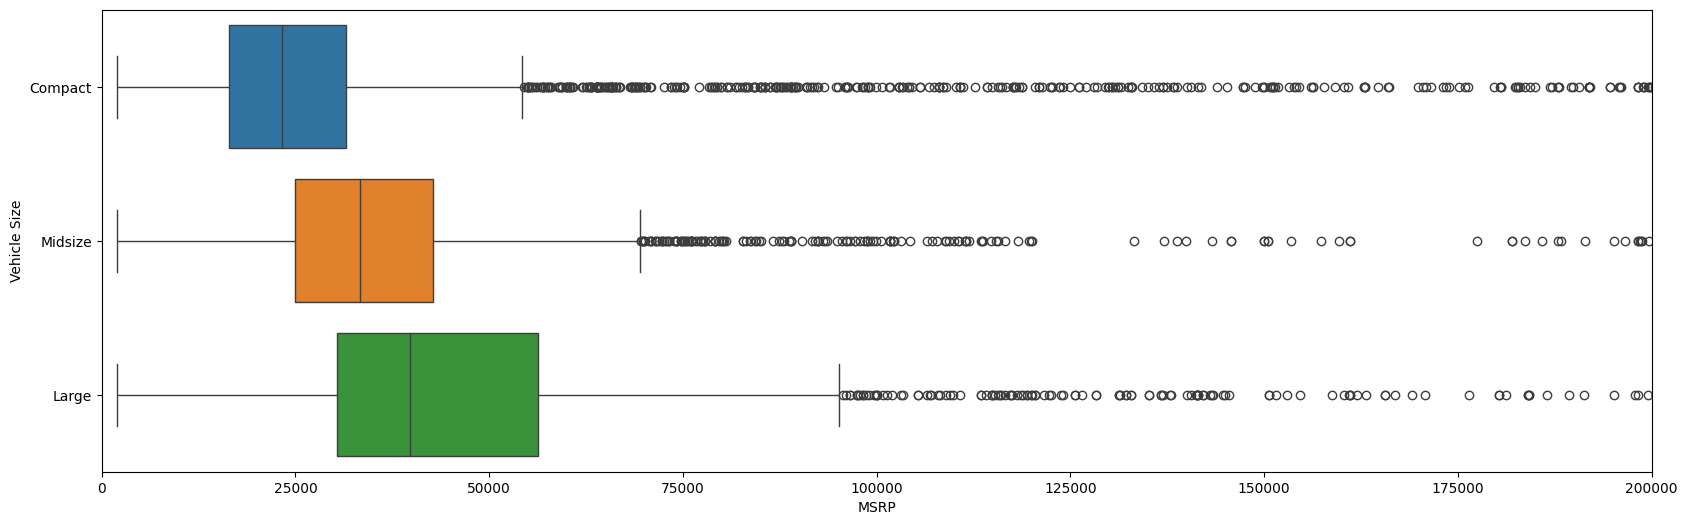

In [284]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='MSRP', y='Vehicle Size', data=df, hue='Vehicle Size')
plt.xlim(0, 100000)

plt.figure(figsize=(20, 6))
sns.boxplot(x='MSRP', y='Vehicle Size', data=df, hue='Vehicle Size')
plt.xlim(0, 200000)

- large cars have highest median price (luxury suvs, trucks)
- compact cars cheapest (economy focus)
- midsize in between (family cars, decent features)
- lots of overlap but clear size = price trend
- luxury models exist in all categories pushing upper ranges

## Engine HP vs Engine Cylinders

0.7845417749825493


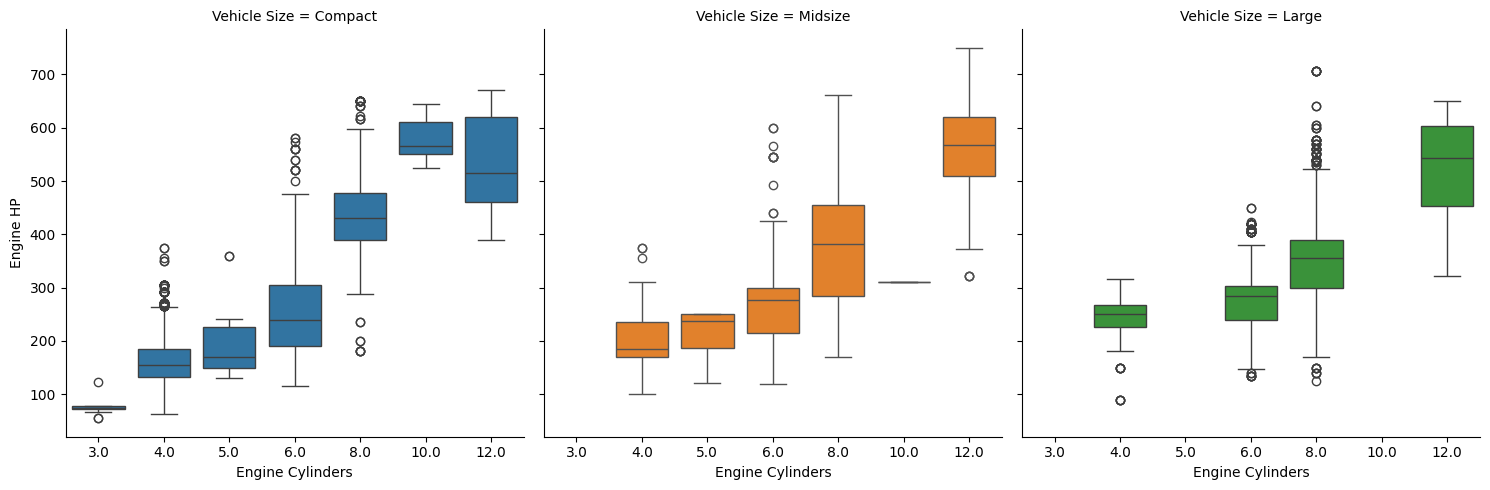

In [285]:
print(df['Engine HP'].corr(df['Engine Cylinders']))
sns.FacetGrid(df, col='Vehicle Size', hue='Vehicle Size', height=5).map(sns.boxplot, 'Engine Cylinders', 'Engine HP', order=None)

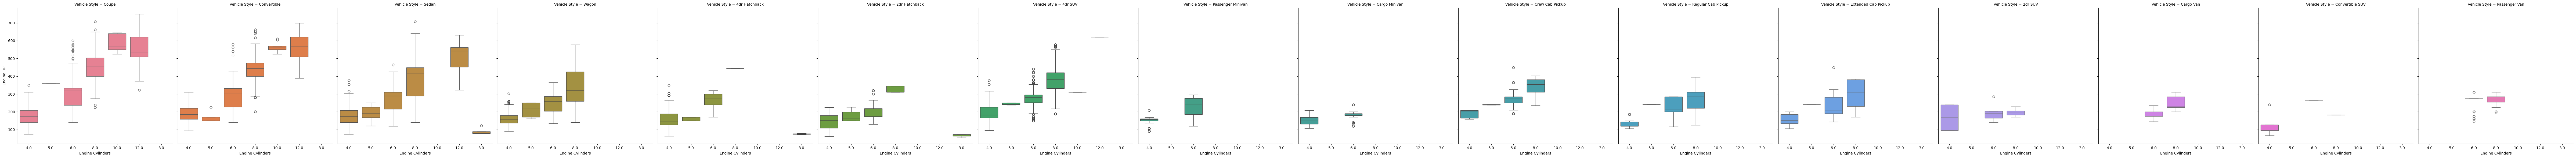

In [286]:
sns.FacetGrid(df, col='Vehicle Style', hue='Vehicle Style', height=6).map(sns.boxplot, 'Engine Cylinders', 'Engine HP', order=None)

- strong positive relationship (more cylinders = more power)
- 4 cylinder caps around 300hp, 6 cylinder goes higher, 8+ even more
- some overlap between categories (turbo 4s vs na 6s, etc)
- vehicle size matters - large cars need more power to move
- performance cars push boundaries within each cylinder count

## Engine HP vs Average MPG

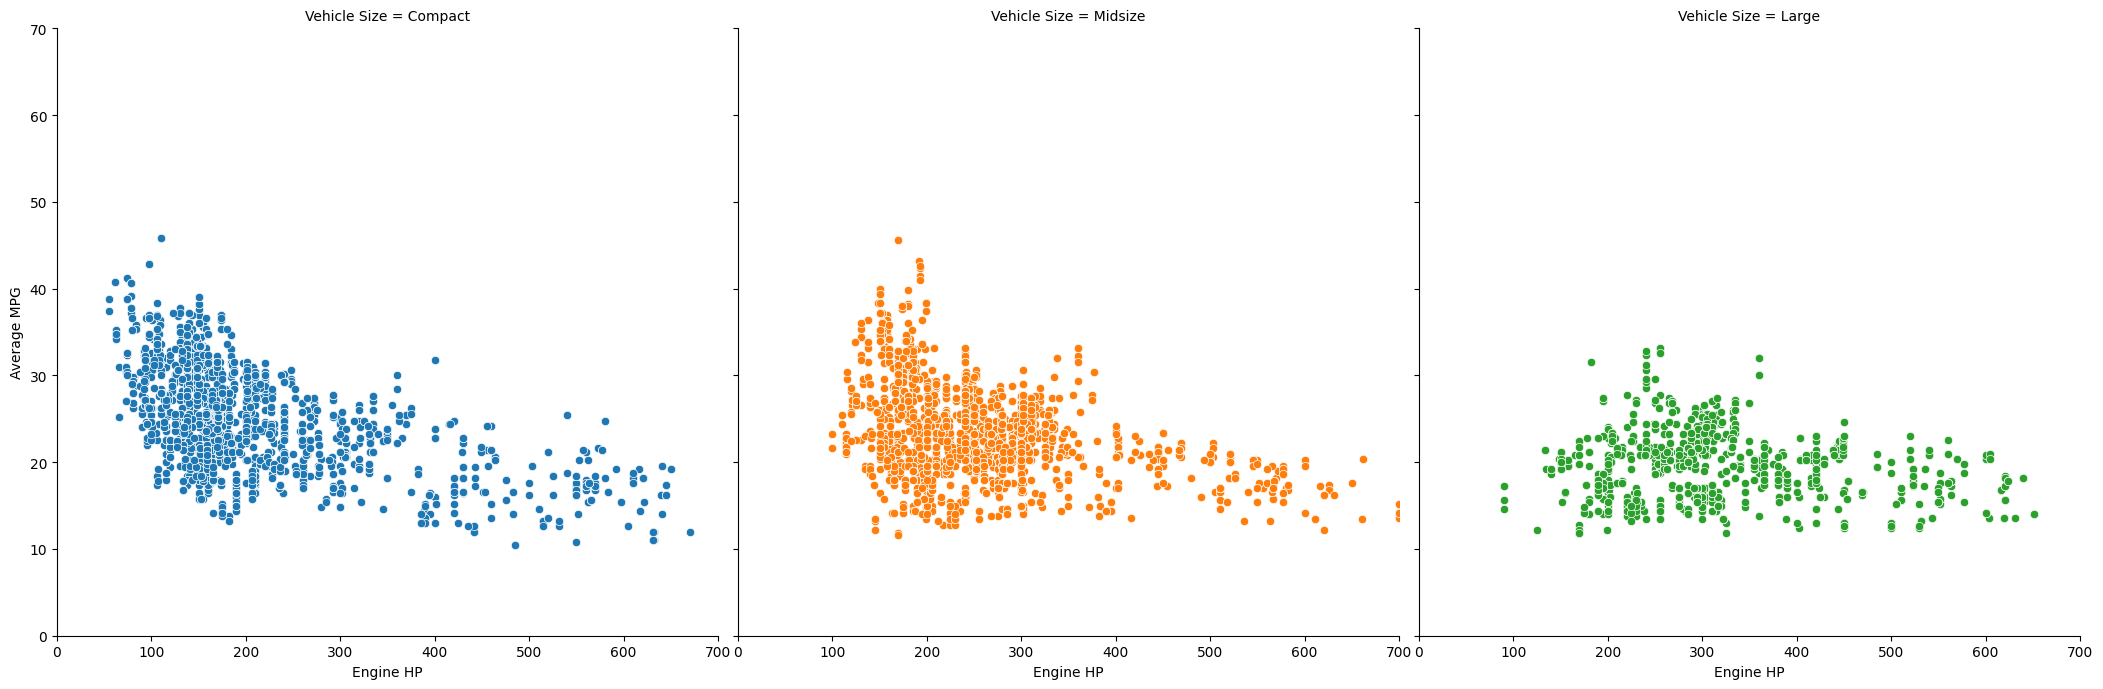

In [287]:
sns.FacetGrid(df, col='Vehicle Size', hue='Vehicle Size', height=7).map(sns.scatterplot, 'Engine HP', 'Average MPG').set(xlim=(0, 700), ylim=(0, 70))


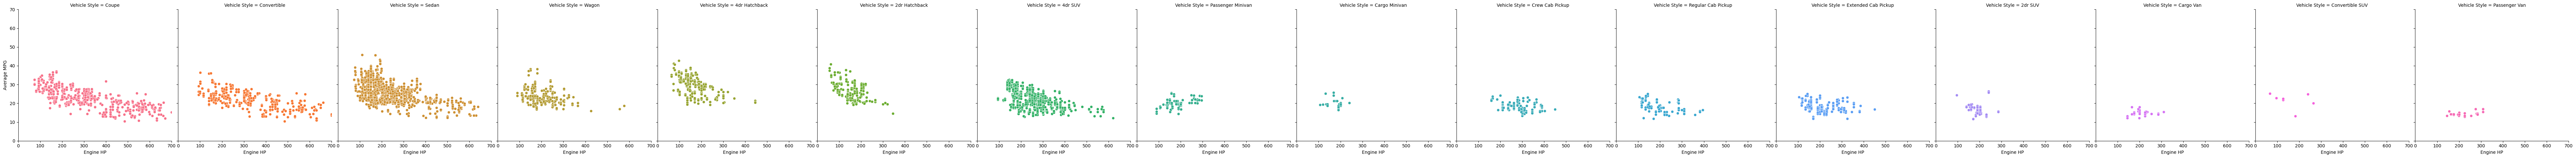

In [288]:
sns.FacetGrid(df, col='Vehicle Style', hue='Vehicle Style', height=5).map(sns.scatterplot, 'Engine HP', 'Average MPG').set(xlim=(0, 700), ylim=(0, 70))

- clear negative correlation: more power = worse fuel economy
- compact cars cluster low hp, high mpg (efficiency focused)
- sports cars high hp, low mpg (performance over efficiency)
- sweet spot around 200hp, 30mpg for balanced vehicles
- physics limitation: can't have both power and efficiency easily

## Engine Cylinders vs Average MPG

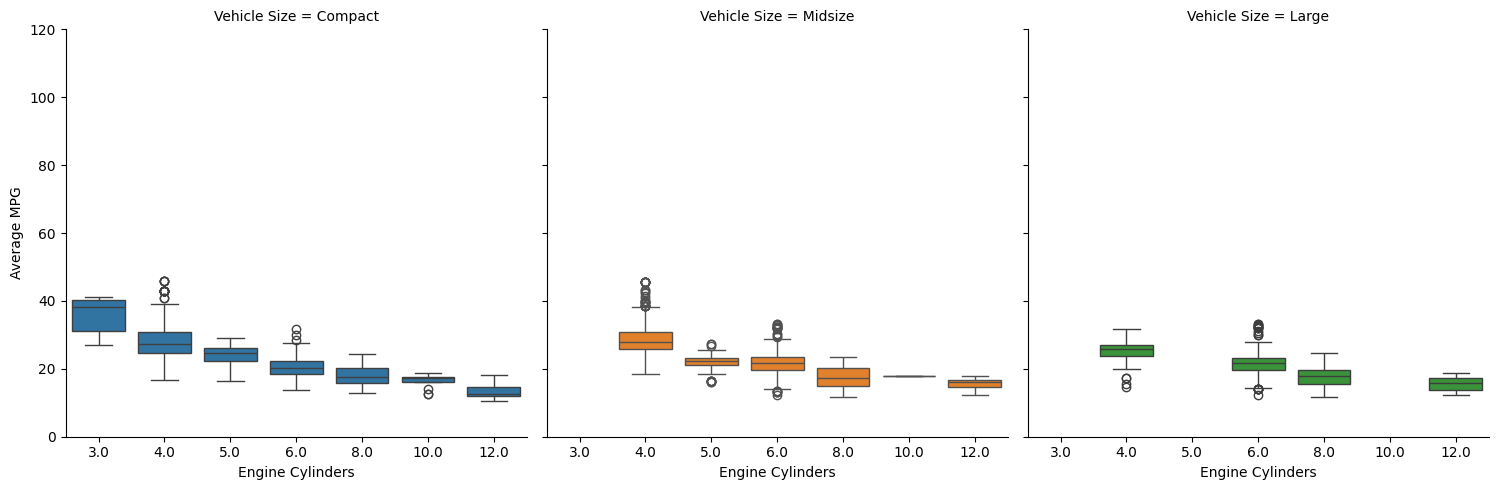

In [289]:
sns.FacetGrid(df, col='Vehicle Size', hue='Vehicle Size', height=5).map(sns.boxplot, 'Engine Cylinders', 'Average MPG', order=None).set(ylim=(0, 120))

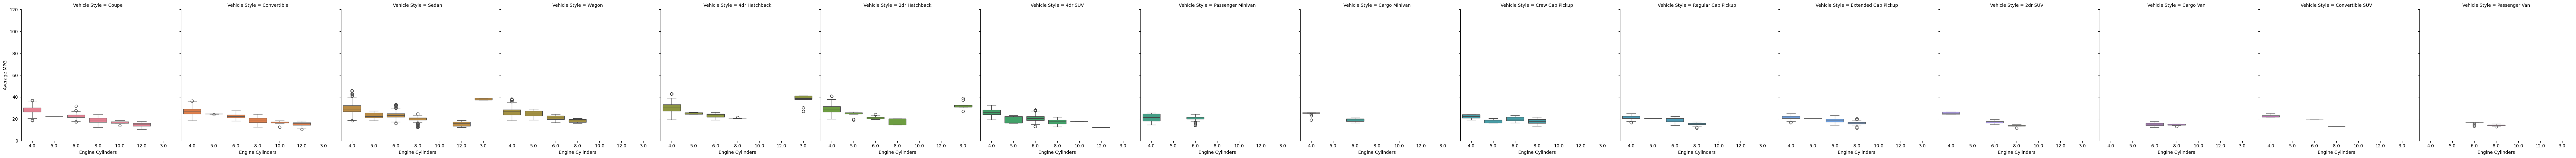

In [290]:
sns.FacetGrid(df, col='Vehicle Style', hue='Vehicle Style', height=5).map(sns.boxplot, 'Engine Cylinders', 'Average MPG', order=None).set(ylim=(0, 120))

- clear downward trend: more cylinders = worse mpg
- 4 cylinder best efficiency (mostly 25-40 mpg)
- 6 cylinder moderate (20-35 mpg range)
- 8+ cylinders poor mpg (15-25 range mostly)
- some overlap due to engine tech differences (turbo, etc)

## Engine HP vs MSRP

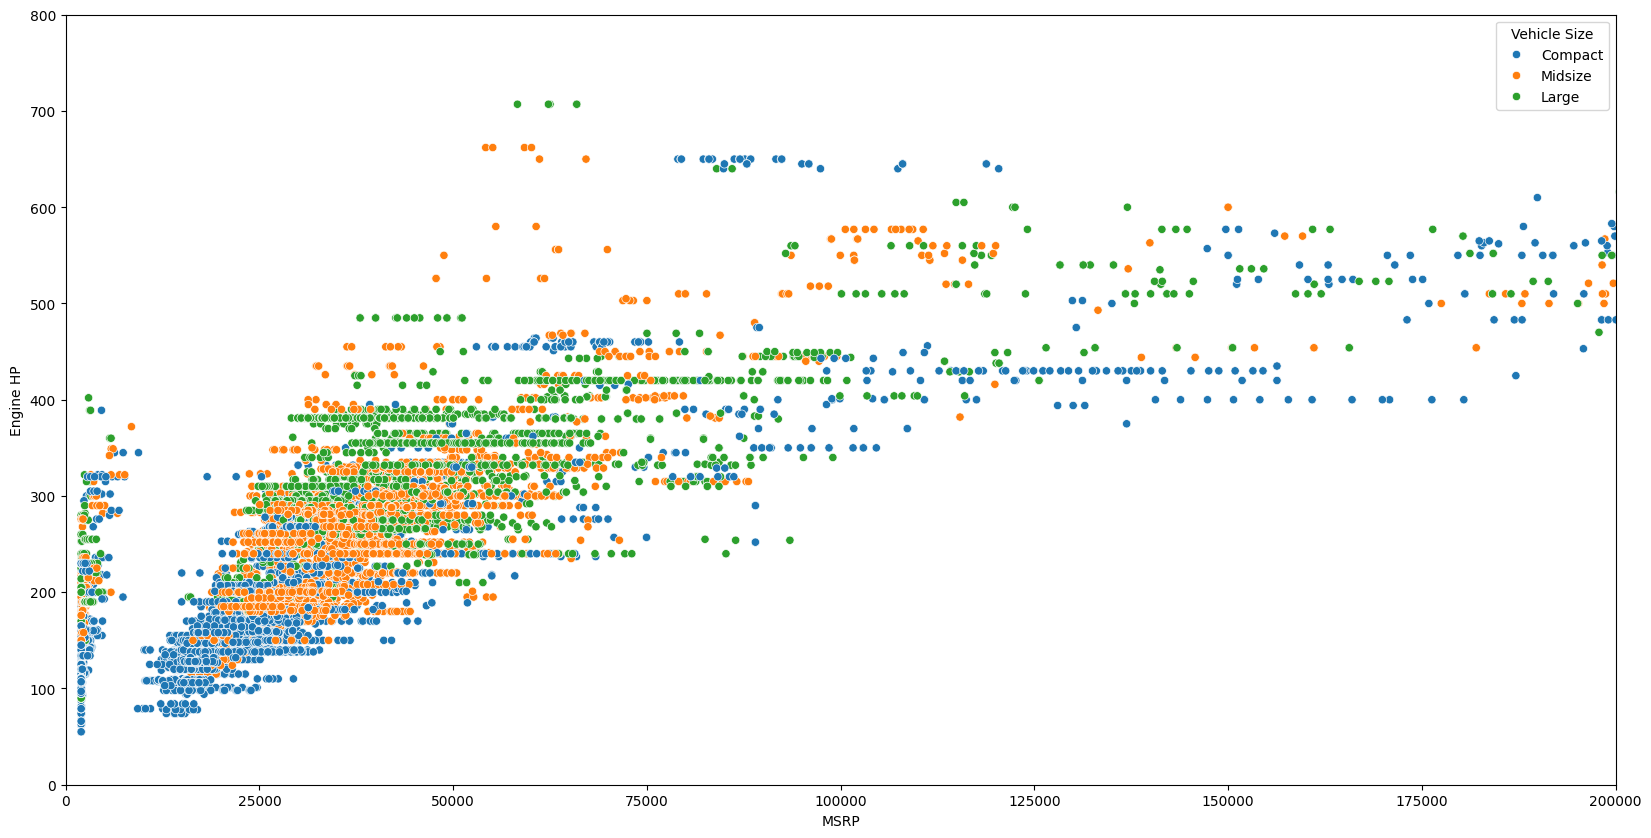

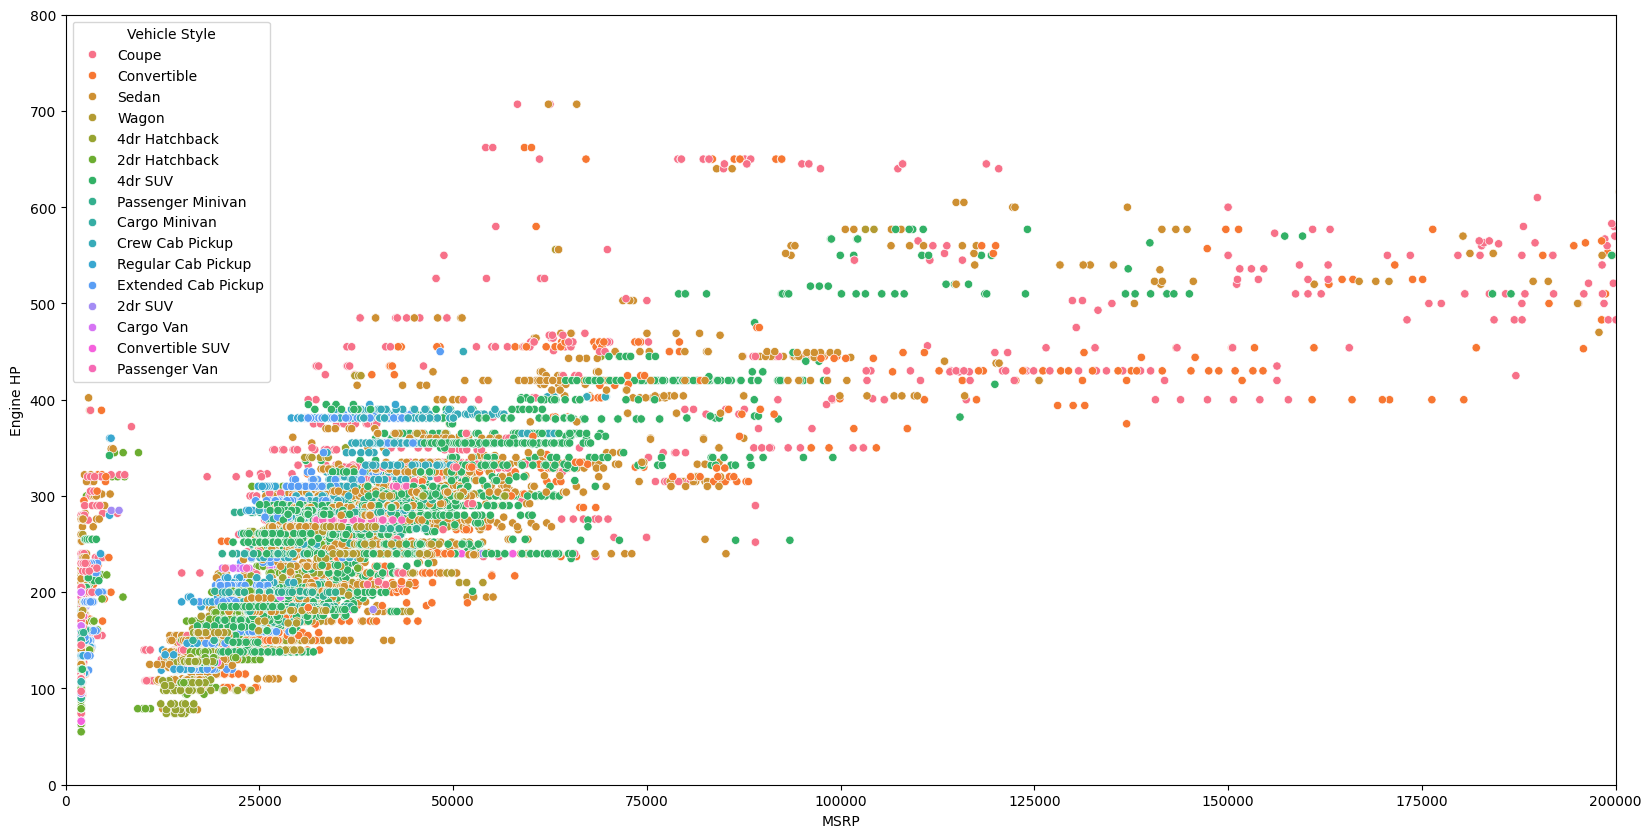

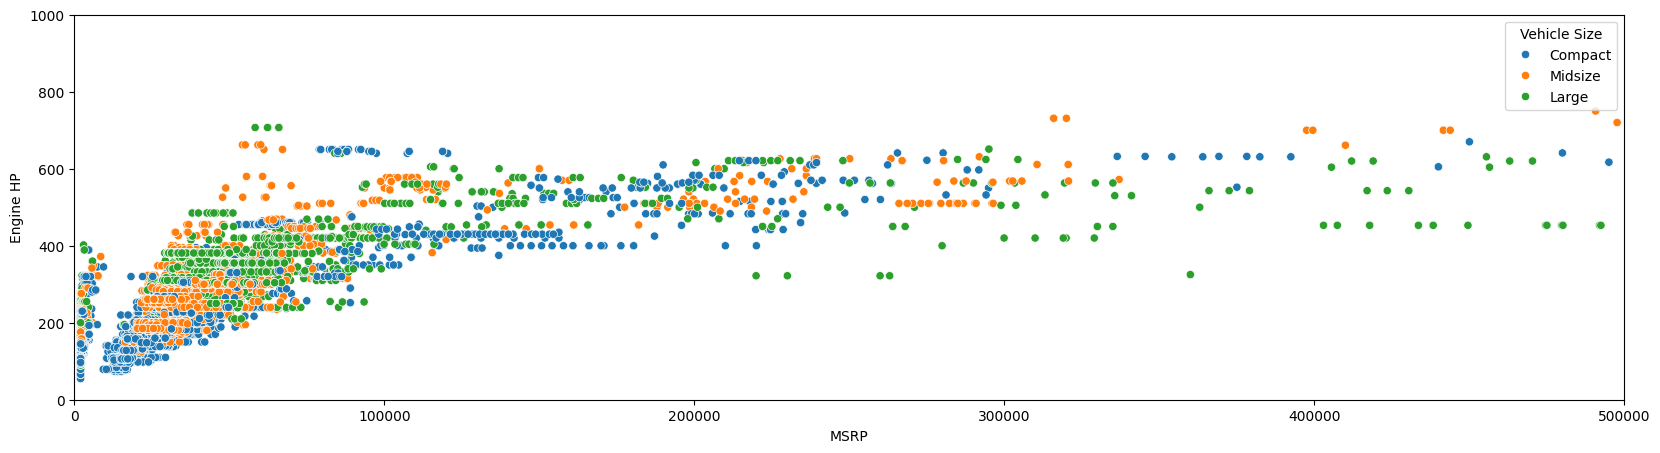

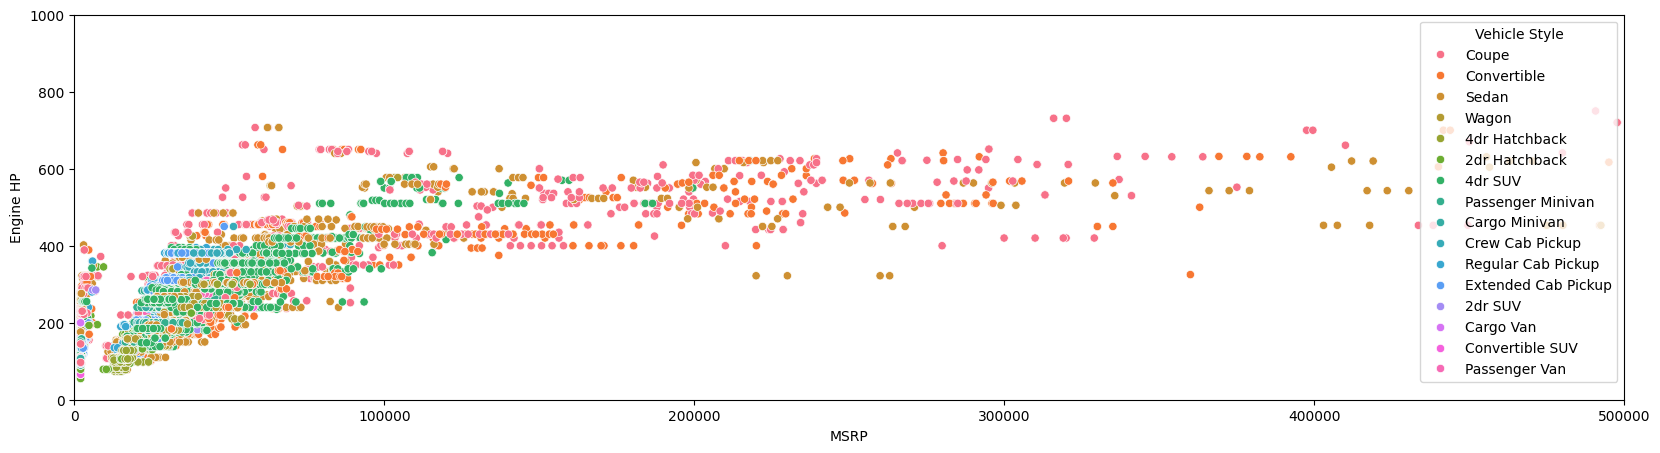

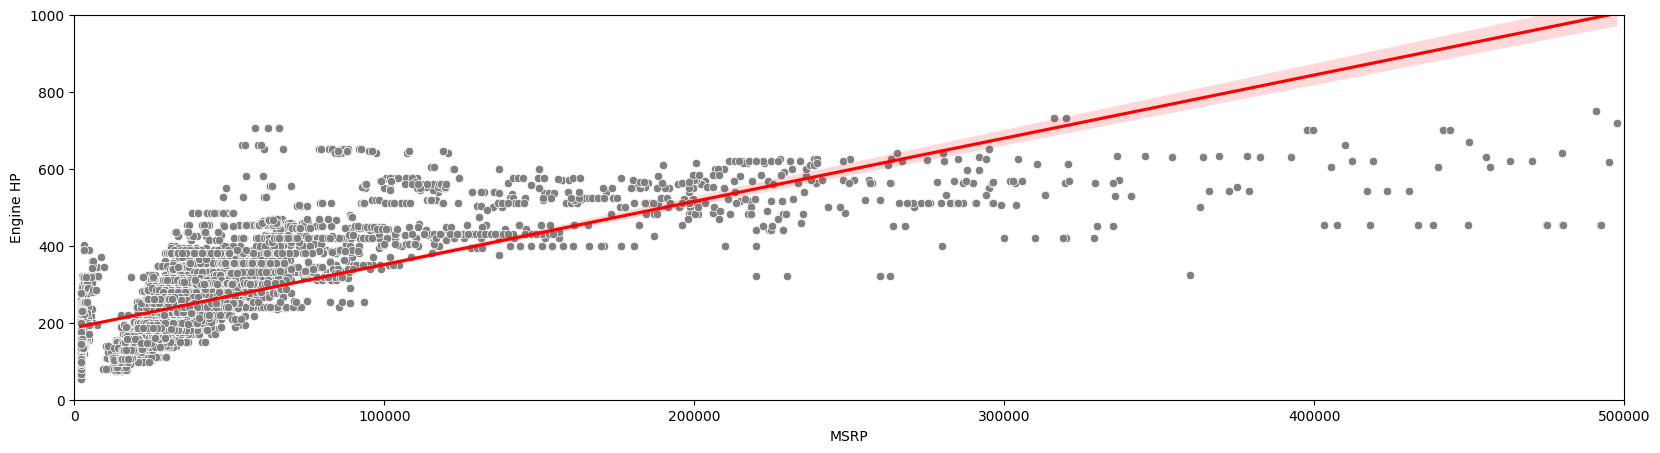

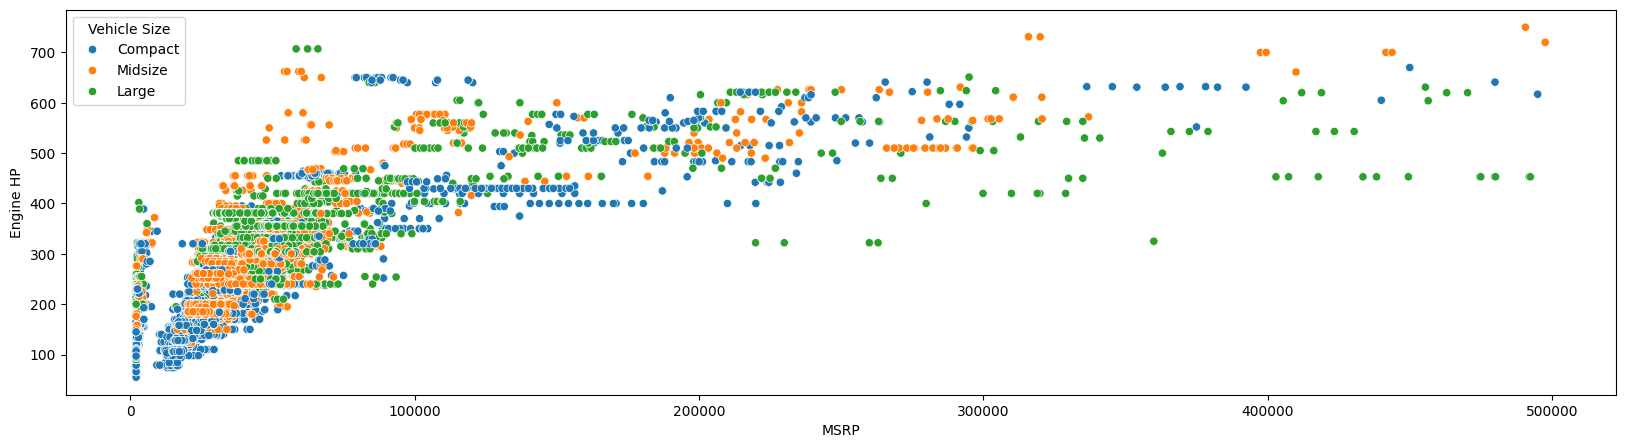

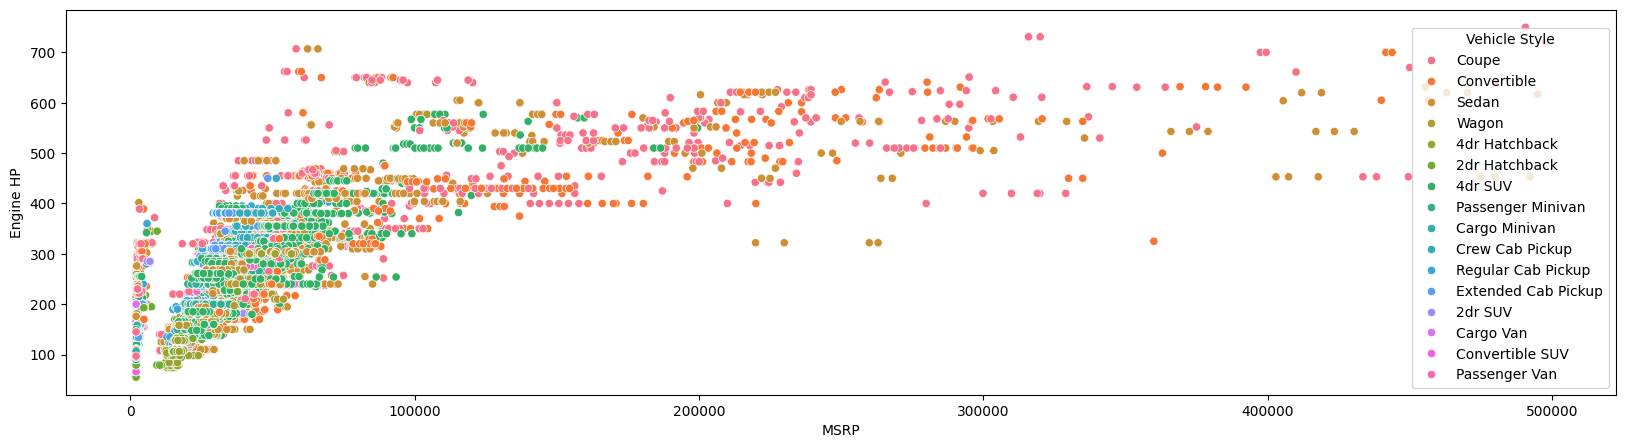

In [291]:
feat1='MSRP'
feat2='Engine HP'
feat3='Vehicle Size'
feat4='Vehicle Style'

for feat in [feat3, feat4]:
  plt.figure(figsize=(20,10))
  sns.scatterplot(data=df, x=feat1, y=feat2, hue=feat)
  plt.xlim(0, 200000)
  plt.ylim(0, 800)

for feat in [feat3, feat4]:
  plt.figure(figsize=(20,5))
  sns.scatterplot(data=df, x=feat1, y=feat2, hue=feat)
  plt.xlim(0, 500000)
  plt.ylim(0, 1000)

plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x=feat1, y=feat2, color='gray')
sns.regplot(data=df, x=feat1, y=feat2, scatter=False, color='red')
plt.xlim(0, 500000)
plt.ylim(0, 1000)

for feat in [feat3, feat4]:
  plt.figure(figsize=(20,5))
  sns.scatterplot(data=df, x=feat1, y=feat2, hue=feat)

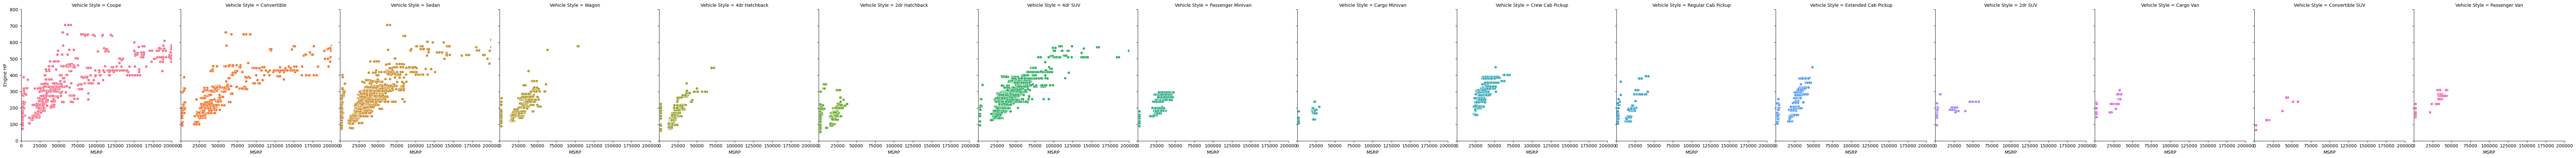

In [292]:
sns.FacetGrid(df, col='Vehicle Style', hue='Vehicle Style', height=5).map(sns.scatterplot, 'MSRP', 'Engine HP').set(xlim = (0, 200000), ylim = (0, 800))

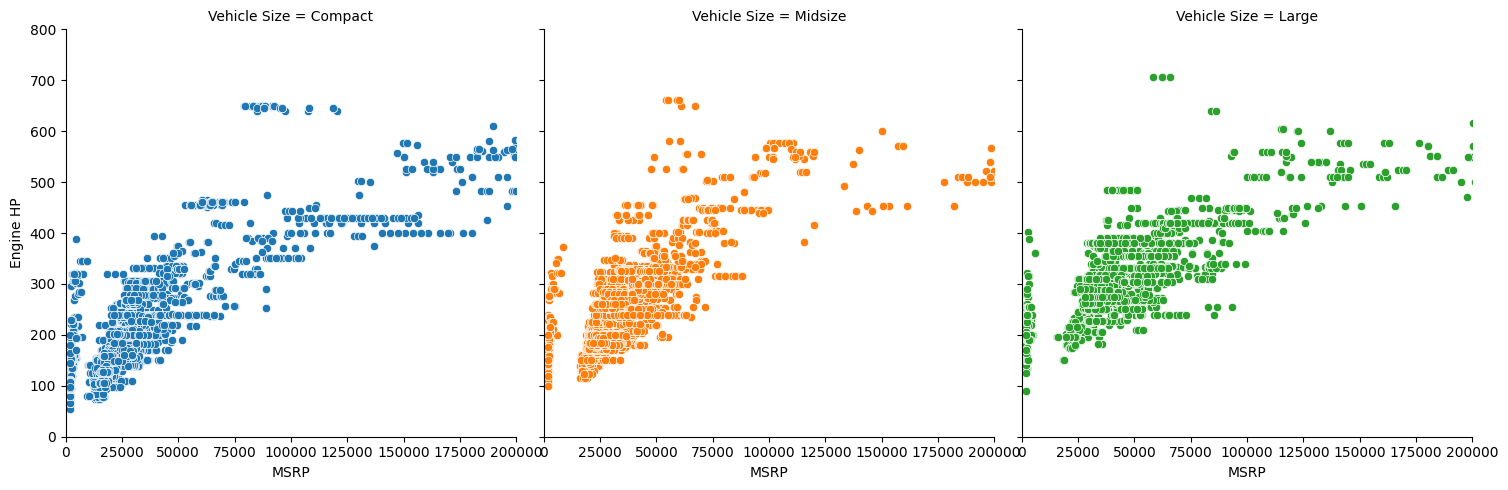

In [293]:
sns.FacetGrid(df, col='Vehicle Size', hue='Vehicle Size', height=5).map(sns.scatterplot, 'MSRP', 'Engine HP').set(xlim = (0, 200000), ylim = (0, 800))

- positive correlation: more power costs more money
- budget cars cluster low hp, low price
- performance cars expensive with high hp
- some outliers - cheap powerful cars (muscle cars) and expensive low-hp (luxury comfort)
- engineering/marketing costs drive the relationship

## Average MSRP of Top 10 Brands by Count

<Axes: xlabel='Make'>

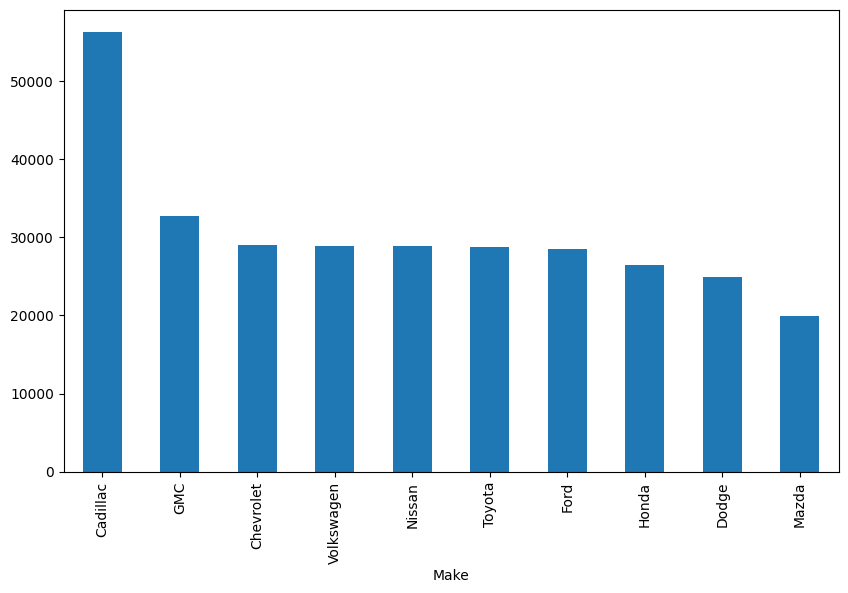

In [294]:
top_makes = df['Make'].value_counts().head(10).index
df_top_makes = df[df['Make'].isin(top_makes)]

avg_price = df_top_makes.groupby('Make')['MSRP'].mean().sort_values(ascending=False)

avg_price.plot(kind='bar', figsize=(10, 6))

- volume doesn't equal high prices (chevrolet high volume, mid price)
- luxury brands command premium even with fewer models
- american brands generally more affordable (chevy, ford, dodge)
- import brands tend to be pricier on average
- brand positioning matters more than volume for pricing

## MSRP vs Popularity

<Axes: xlabel='MSRP', ylabel='Popularity'>

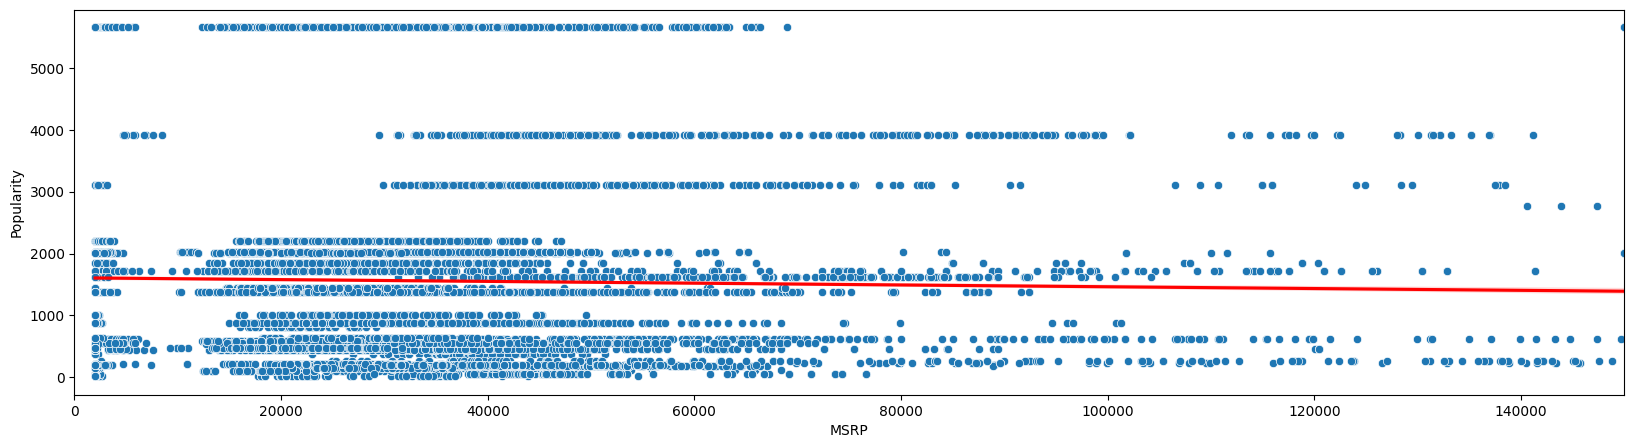

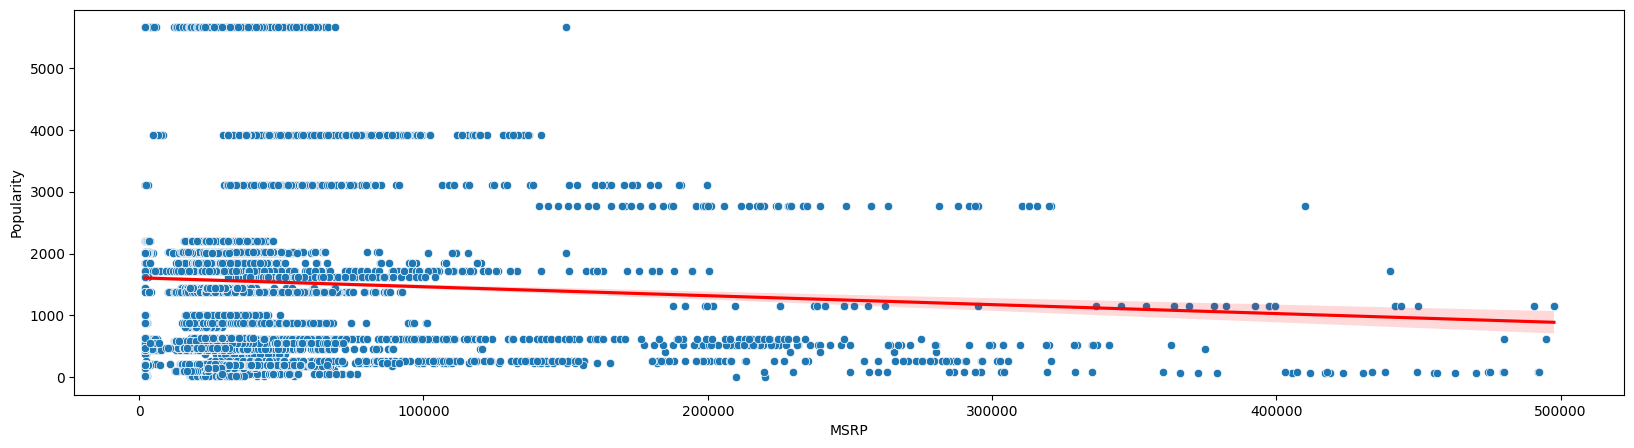

In [295]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x='MSRP', y='Popularity')
sns.regplot(data=df, x='MSRP', y='Popularity', scatter=False, color='red')
plt.xlim(0, 150000)

plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x='MSRP', y='Popularity')
sns.regplot(data=df, x='MSRP', y='Popularity', scatter=False, color='red')

- weak negative correlation: expensive cars tend to be less popular
- mass market cars cluster low price, high popularity
- luxury cars expensive but niche appeal
- sweet spot around $30k where price meets popularity
- volume economics vs premium positioning trade-off

## Popularity vs Make

<Axes: xlabel='Popularity', ylabel='Make'>

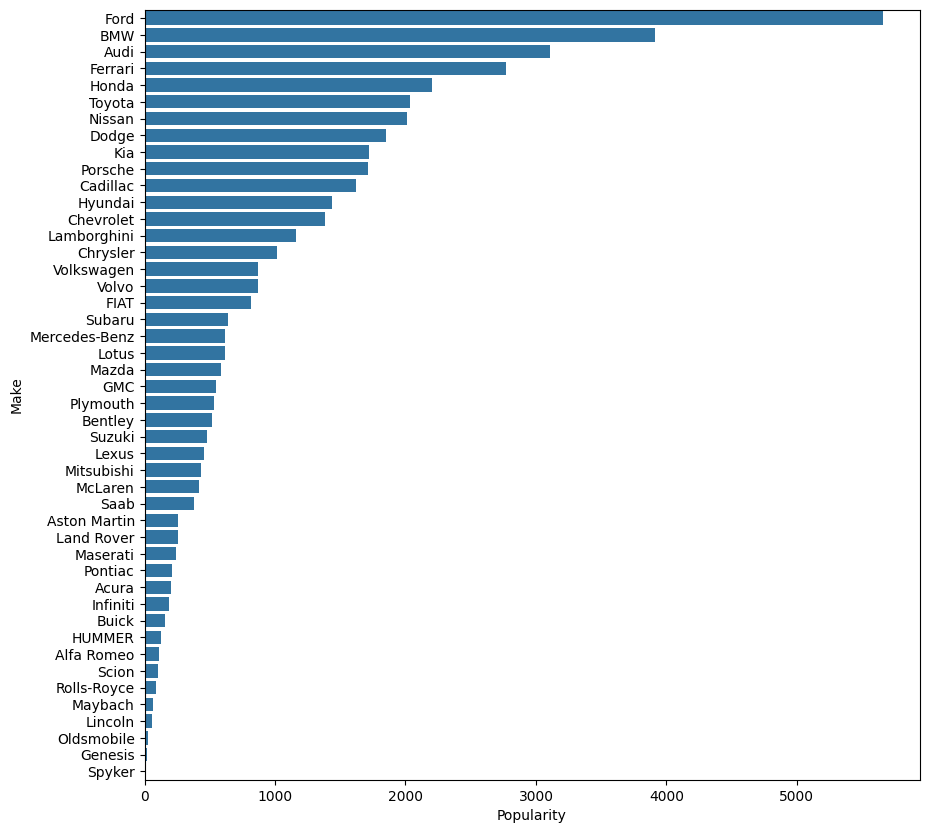

In [296]:
plt.figure(figsize=(10, 10))
order = df.groupby('Make')['Popularity'].mean().sort_values(ascending=False).index
sns.barplot(x='Popularity', y='Make', data=df, orient='h', order=order)

- ford leads popularity (likely due to high sales volume, broad model range, and strong presence in mass-market segments)
- toyota and honda also high in popularity (reliability reputation)
- american brands variable popularity 
- luxury brands generally lower popularity (niche markets)
- practical brands beat prestige brands in mass appeal
- reliability/value perception drives popularity more than image

## Make vs MSRP

<Axes: xlabel='MSRP', ylabel='Make'>

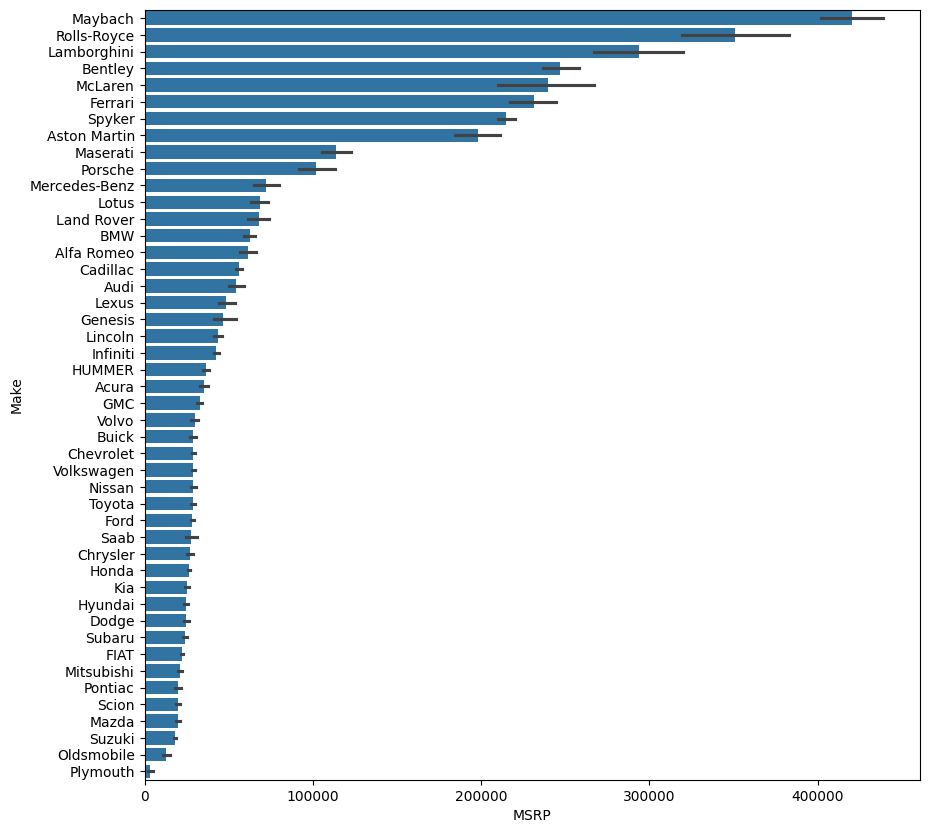

In [297]:
plt.figure(figsize=(10, 10))
order = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).index
sns.barplot(x='MSRP', y='Make', data=df, orient='h', order=order)

- luxury european brands at top (rolls royce, ferrari, etc)
- japanese luxury decent pricing (acura, infiniti, lexus)
- american brands mostly affordable (ford, chevy, dodge)
- clear brand positioning reflected in average prices
- heritage and country of origin influence pricing power

## Transmission Type vs Average MPG

(0.0, 60.0)

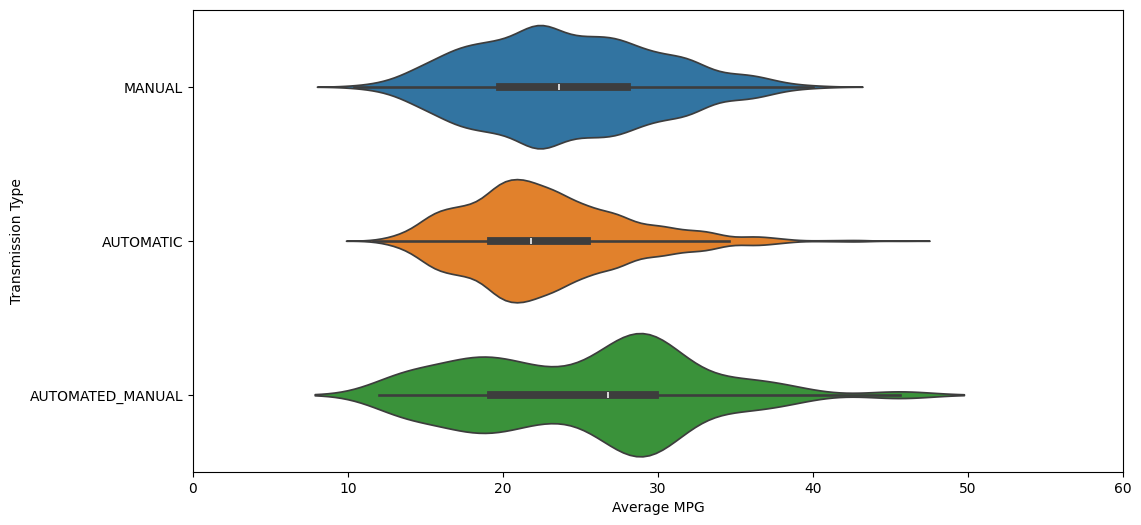

In [298]:
plt.figure(figsize=(12, 6))
sns.violinplot(df, x='Average MPG', y='Transmission Type', inner='box', hue='Transmission Type')
plt.xlim(0, 60)

(0.0, 40.0)

<Figure size 1200x600 with 0 Axes>

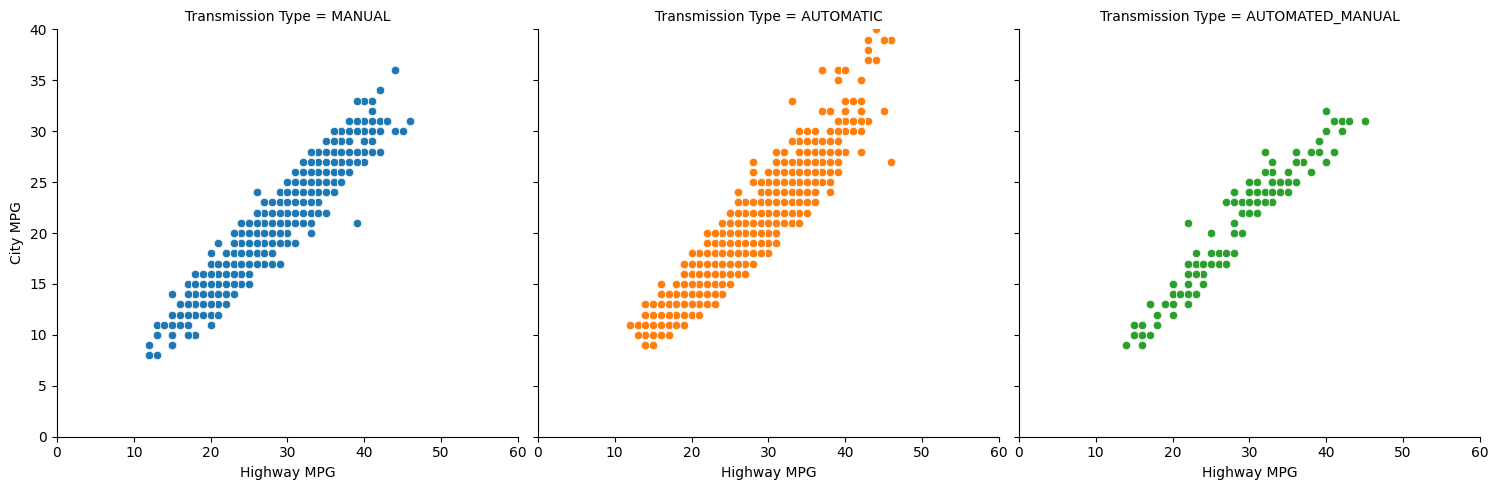

In [299]:
plt.figure(figsize=(12, 6))
sns.FacetGrid(df, col='Transmission Type', hue='Transmission Type', height=5).map(sns.scatterplot, 'Highway MPG', 'City MPG').set(xlim=(0, 60), ylim=(0, 60))
plt.xlim(0, 60)
plt.ylim(0, 40)

- manual transmissions show wider mpg spread (driver dependent)
- automatics more consistent mpg (computer controlled)
- automated manual best of both worlds (efficiency + convenience)
- manual can achieve better mpg with skilled driving
- automatics sacrifice some efficiency for convenience

## Price, City/Highway MPG, Popularity

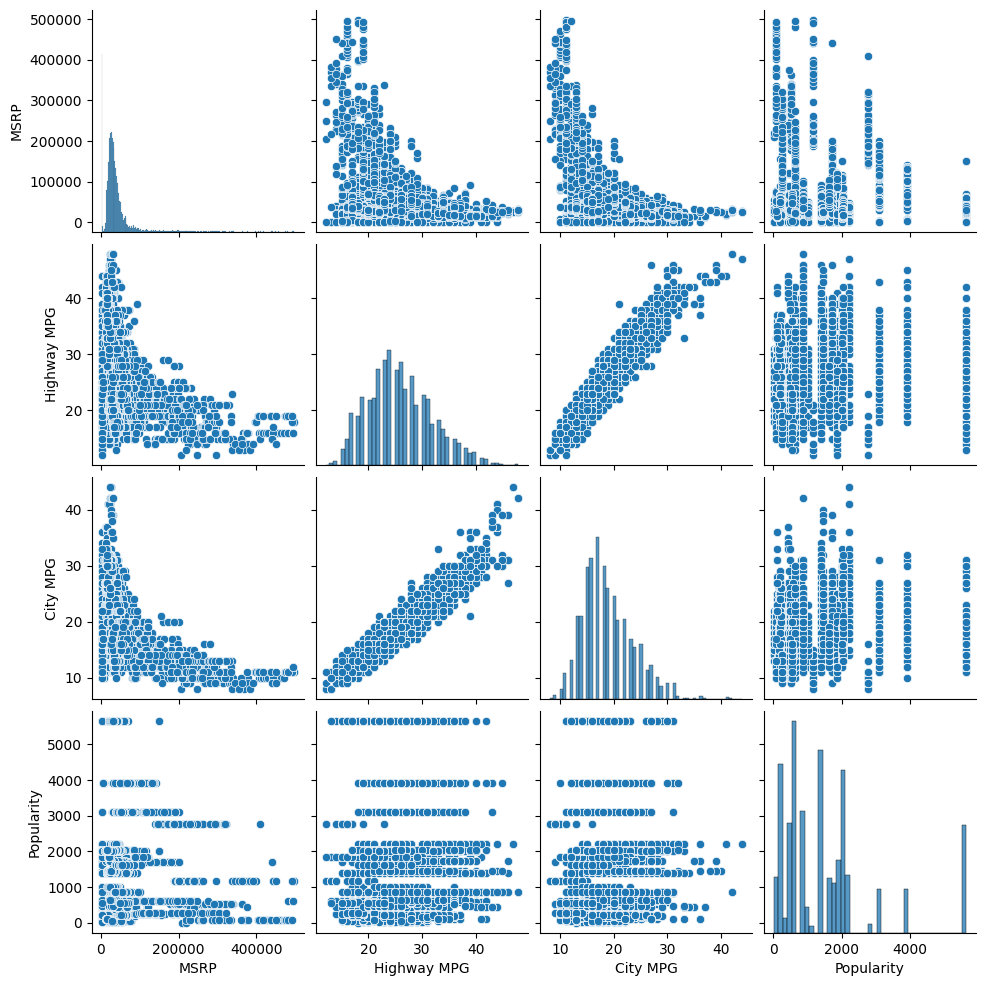

In [300]:
sns.pairplot(df[['MSRP', 'Highway MPG', 'City MPG', 'Popularity']])

- price negatively correlates with both mpg and popularity
- highway/city mpg strongly correlated (expected)
- popularity weakly related to mpg (efficiency not main driver)
- complex trade-offs between price, efficiency, and mass appeal
- no single variable predicts the others perfectly

## Transmission Type vs Engine HP

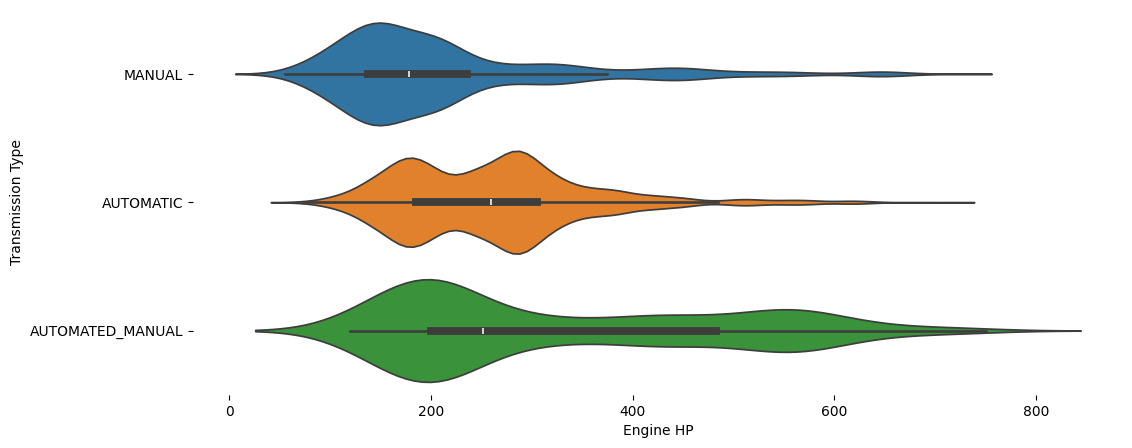

In [301]:
plt.figure(figsize=(12, 5))
sns.violinplot(df, x='Engine HP', y='Transmission Type', inner='box', hue='Transmission Type')
sns.despine(top=True, right=True, bottom=True, left=True)

- automatics handle wider hp range (low to very high)
- manuals concentrated in mid-range hp (sports cars, economy)
- automated manual rare but covers performance range
- automatics better for very high hp (luxury/performance cars)
- manual preference in enthusiast/sports car segment

## Driven Wheels vs Vehicle Size

Text(70.72222222222221, 0.5, 'Vehicle Size')

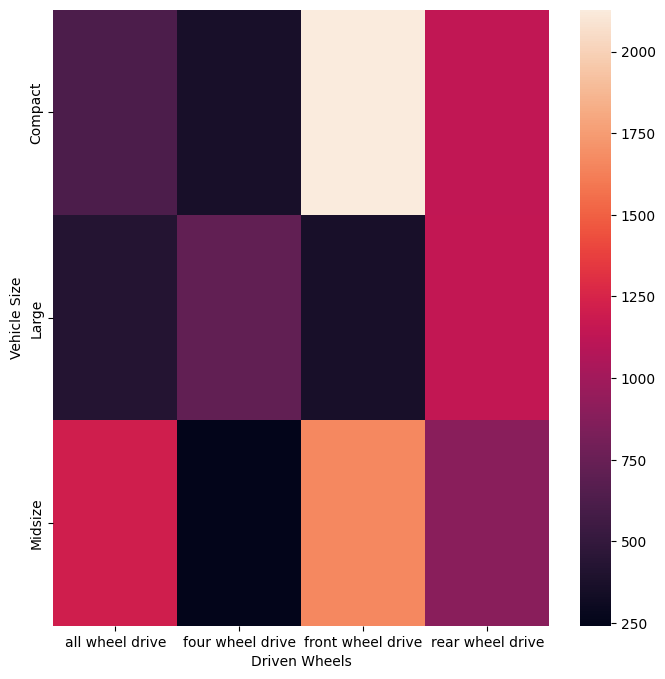

In [302]:
plt.figure(figsize=(8, 8))
temp = pd.DataFrame({x_label: grp['Vehicle Size'].value_counts() for x_label, grp in df.groupby('Driven Wheels')})
sns.heatmap(temp)
plt.xlabel('Driven Wheels')
plt.ylabel('Vehicle Size')

- front wheel drive dominates compact/midsize (efficiency, cost)
- rear wheel drive more common in large vehicles 
- four wheel drive less common overall but generally common in large sizes 
- practical considerations drive most choices over performance

## Transmission Type vs Driven Wheels

Text(70.72222222222221, 0.5, 'Driven Wheels')

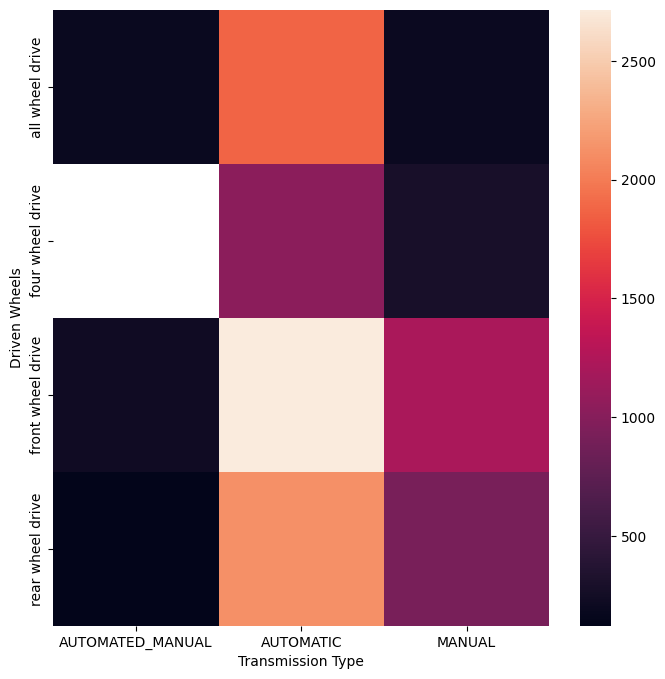

In [303]:
plt.figure(figsize=(8, 8))
temp = pd.DataFrame({x_label: grp['Driven Wheels'].value_counts() for x_label, grp in df.groupby('Transmission Type')})
sns.heatmap(temp)
plt.xlabel('Transmission Type')
plt.ylabel('Driven Wheels')

- automatics paired with all drivetrain types (versatile)
- manuals more common with front/rear wheel drive (sports cars, economy)
- automated manuals rare across all drivetrains except four wheel, where they are most common
- engineering/cost considerations drive most combinations
- performance cars favor manual, economy cars auto (both generally more common with front wheel drive)

## Number of Doors vs Average MPG

Text(0, 0.5, 'Number of Doors')

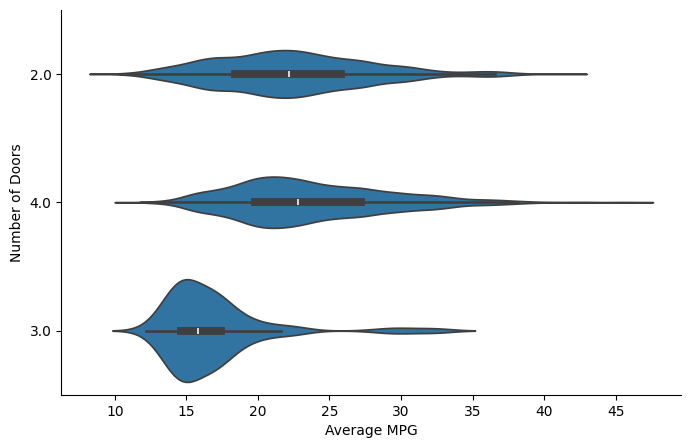

In [304]:
plt.figure(figsize=(8, 5))
sns.violinplot(df, x='Average MPG', y=df['Number of Doors'].astype(str), inner='box')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Number of Doors')

- 4-door cars have widest mpg range (family cars, all sizes)
- 2-door cars tend toward lower mpg (sports cars, performance focus)
- 3-door rare, low mpg (likely minivans/cargo vans)
- door count loosely indicates vehicle purpose/target market

## Engine HP vs Engine Cylinders Distribution

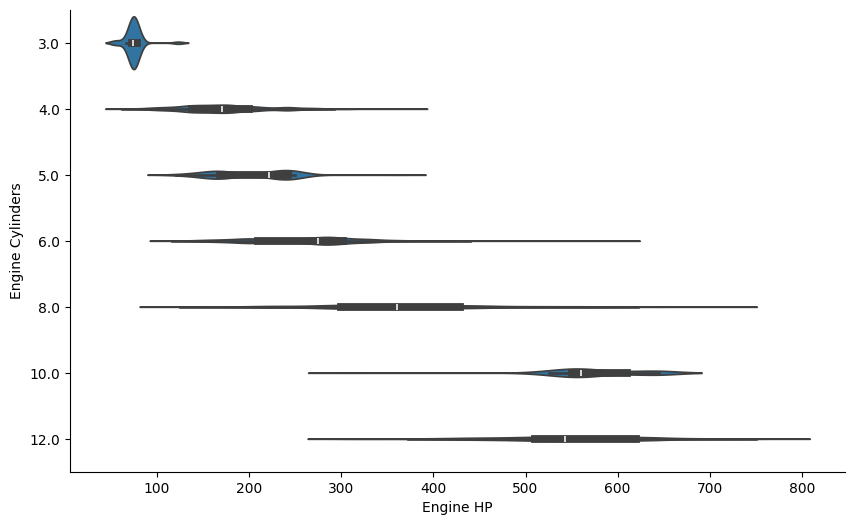

In [305]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Engine HP', y='Engine Cylinders', inner='box', orient='h')
plt.gca().spines[['top', 'right']].set_visible(False)

- clear progression: more cylinders generally = more hp
- 8+ cylinder engines consistently high hp (300+ range)
- 4-cylinder surprisingly wide range (economy to turbo performance)
- engine technology can blur traditional cylinder/power relationships